# Training of model
Type of ML: Deep Q Reinforcement Learning
Model based on following github: [Link](https://github.com/pskrunner14/trading-bot)



Modifications:
 - Input for agent: 2 stocks instead of 1 (1 target, 1 as additional information)
 - Limit: Agent can buy max. 10 stocks
 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import altair as alt
#import seaborn as sns
import datetime
import pandas_datareader.data as web


import matplotlib.pyplot as plt

import logging
import coloredlogs

from train import *
from evaluate import show_eval_result

# Altair:
# in case of error on notebook: Istll vega_datasets
#conda install -c conda-forge altair vega_datasets notebook vega
#see also https://altair-viz.github.io/getting_started/installation.html
alt.renderers.enable('notebook')

Using TensorFlow backend.


[[0.5        0.5        0.5        0.5        0.00247262 0.99330715]]
(1, 6)


RendererRegistry.enable('notebook')

## Set relevant parameters
 - Window-Size: cutout of stock data that agent gets as state for his decision making
 - ep_count: # of epochs
 - Model Name (model saved automatically after 10 epochs)
 - Pretrained: Load Pretrained Model or create new one

In [3]:
window_size = 10
batch_size = 20 
ep_count = 150 # 3-5 for debugging, otherwise 20-200
model_name = 'model_w10v4'
pretrained = False
debug = False

## Load Datasets into pandas DataFrame
## Load different types of stocks in model:
 - Growth: Adobe (ADBE), Apple (AAPL)
 - Cyclical: Royal Caribbean (RCL)
 - Slow and low dividend: Costco (COST)
 - Turnaround: A&F (ANF)

Symbols,AAPL,ADBE,ADP,AMZN,ANF,CERN,COST,CRM,EXPE,LOW,MTH,RCL,WYNN
Date,,,,,,,,,,,,,
2012-01-03,51.269413,28.570000,39.757862,179.029999,37.513138,31.115179,67.481003,25.299999,27.385767,22.221781,23.780001,22.028625,86.954262
2012-01-04,51.544937,28.280001,39.714073,177.509995,36.262455,30.702301,67.058258,24.370001,26.804073,23.049004,23.709999,22.215746,85.458839
2012-01-05,52.117188,28.480000,40.006092,177.610001,35.211254,31.055487,66.412148,24.692499,26.564005,22.961931,24.299999,22.113682,84.566162
2012-01-06,52.662014,28.719999,40.064480,182.610001,34.459309,31.572830,64.713181,25.264999,27.007204,22.935804,24.389999,21.688419,81.590660
2012-01-09,52.578468,28.530001,39.911171,178.559998,35.011761,31.413649,63.022152,25.187500,26.434744,22.726822,24.450001,21.756460,81.361763


<Figure size 432x288 with 0 Axes>

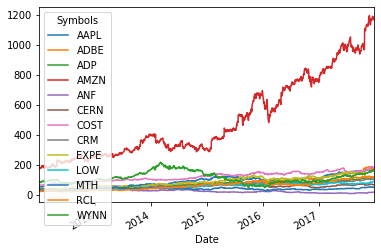

In [5]:
# Loading Train Data
# Setting Start and Enddate for Validation

start_train= datetime.datetime(2012, 1, 1)
end_train = datetime.datetime(2018, 1, 1)
start_val = end_train
end_val = datetime.datetime.now()
TStocks = ['ADBE', 'AAPL','CERN','CRM', 'EXPE', 'RCL','WYNN','COST', 'ANF','ADP','AMZN','LOW','ANF','MTH']

# Load Train Data

# Load several stocks (growth, cyclical, Slow and Low Dividend, Turnaround)
df_train = web.DataReader(TStocks,'yahoo',
                               start=start_train, end=end_train)['Adj Close']

# 2nd feature: Gold as sign of economic situation (high in crisys)
df2_train = web.DataReader('GOLD','yahoo',
                               start=start_train, #start_train
                               end=end_train) #end_train

# Load Validation Data

df_val = web.DataReader(TStocks,'yahoo',
                               start=start_val, #start_train
                               end=end_val)['Adj Close'] #end_val
df2_val = web.DataReader('GOLD','yahoo',
                               start=start_val, #start_val
                               end=end_val)  #end_val


# Convert df2_test to list
df2_train_list = list(df2_train['Adj Close'])
df2_val_list = list(df2_val['Adj Close'])

plt.figure();
df_train.plot();
df_train.head()

## Training of Model
 - Create new model for every stock
 - Comparison of models: see at the end of this Jupyter
 - Training one model at all stocks led to poor performance

I1007 21:18:56.315020  6740 train.py:156] switching to TensorFlow for CPU
2019-10-07 21:18:56 PC-Stefan root[8116] DEBUG switching to TensorFlow for CPU


model_w10v4_AAPL


W1007 21:18:56.377534  6740 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2019-10-07 21:18:56 PC-Stefan tensorflow[8116] WARNING From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1007 21:18:56.377534  6740 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

2019-10-07 21:18:56 PC-Stefan tensorflow[8116] WARNING From C:\ProgramData\Anaconda3\envs\2019\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1007 21:18:56.39315

2019-10-07 21:22:59 PC-Stefan root[8116] INFO Episode 13/150 - Train Position: +$87.09  Val Position: +$107.04  Train Loss: 0.1018  (~17.6366 secs)
Episode 14/150: 100%|██████████| 1508/1508 [00:17<00:00, 86.41it/s]
I1007 21:23:16.619302  6740 train.py:147] Episode 14/150 - Train Position: +$164.13  Val Position: +$165.35  Train Loss: 0.1080  (~17.4567 secs)
2019-10-07 21:23:16 PC-Stefan root[8116] INFO Episode 14/150 - Train Position: +$164.13  Val Position: +$165.35  Train Loss: 0.1080  (~17.4567 secs)
Episode 15/150: 100%|██████████| 1508/1508 [00:18<00:00, 83.60it/s]
I1007 21:23:34.791976  6740 train.py:147] Episode 15/150 - Train Position: +$193.26  Val Position: +$135.63  Train Loss: 0.1350  (~18.0497 secs)
2019-10-07 21:23:34 PC-Stefan root[8116] INFO Episode 15/150 - Train Position: +$193.26  Val Position: +$135.63  Train Loss: 0.1350  (~18.0497 secs)
Episode 16/150: 100%|██████████| 1508/1508 [00:17<00:00, 84.22it/s]
I1007 21:23:52.807461  6740 train.py:147] Episode 16/150 - T

2019-10-07 21:29:49 PC-Stefan root[8116] INFO Episode 36/150 - Train Position: +$227.80  Val Position: +$184.21  Train Loss: 0.1927  (~17.3743 secs)
Episode 37/150: 100%|██████████| 1508/1508 [00:18<00:00, 81.78it/s]
I1007 21:30:08.345933  6740 train.py:147] Episode 37/150 - Train Position: +$152.78  Val Position: +$199.24  Train Loss: 0.1720  (~18.4505 secs)
2019-10-07 21:30:08 PC-Stefan root[8116] INFO Episode 37/150 - Train Position: +$152.78  Val Position: +$199.24  Train Loss: 0.1720  (~18.4505 secs)
Episode 38/150: 100%|██████████| 1508/1508 [00:18<00:00, 80.98it/s]
I1007 21:30:27.112249  6740 train.py:147] Episode 38/150 - Train Position: +$158.19  Val Position: +$214.45  Train Loss: 0.1674  (~18.6198 secs)
2019-10-07 21:30:27 PC-Stefan root[8116] INFO Episode 38/150 - Train Position: +$158.19  Val Position: +$214.45  Train Loss: 0.1674  (~18.6198 secs)
Episode 39/150: 100%|██████████| 1508/1508 [00:17<00:00, 86.06it/s]
I1007 21:30:44.756213  6740 train.py:147] Episode 39/150 - 

2019-10-07 21:36:44 PC-Stefan root[8116] INFO Episode 59/150 - Train Position: +$236.12  Val Position: +$233.85  Train Loss: 0.1769  (~17.9695 secs)
Episode 60/150: 100%|██████████| 1508/1508 [00:17<00:00, 84.57it/s]
I1007 21:37:02.527360  6740 train.py:147] Episode 60/150 - Train Position: +$171.98  Val Position: +$207.67  Train Loss: 0.1897  (~17.8309 secs)
2019-10-07 21:37:02 PC-Stefan root[8116] INFO Episode 60/150 - Train Position: +$171.98  Val Position: +$207.67  Train Loss: 0.1897  (~17.8309 secs)
Episode 61/150: 100%|██████████| 1508/1508 [00:18<00:00, 83.22it/s]
I1007 21:37:20.778404  6740 train.py:147] Episode 61/150 - Train Position: +$119.19  Val Position: +$155.88  Train Loss: 0.1950  (~18.1190 secs)
2019-10-07 21:37:20 PC-Stefan root[8116] INFO Episode 61/150 - Train Position: +$119.19  Val Position: +$155.88  Train Loss: 0.1950  (~18.1190 secs)
Episode 62/150: 100%|██████████| 1508/1508 [00:17<00:00, 84.98it/s]
I1007 21:37:38.654970  6740 train.py:147] Episode 62/150 - 

2019-10-07 21:43:37 PC-Stefan root[8116] INFO Episode 82/150 - Train Position: +$293.65  Val Position: +$197.39  Train Loss: 0.2232  (~17.9966 secs)
Episode 83/150: 100%|██████████| 1508/1508 [00:18<00:00, 83.44it/s]
I1007 21:43:55.584615  6740 train.py:147] Episode 83/150 - Train Position: +$283.95  Val Position: +$117.46  Train Loss: 0.2349  (~18.0750 secs)
2019-10-07 21:43:55 PC-Stefan root[8116] INFO Episode 83/150 - Train Position: +$283.95  Val Position: +$117.46  Train Loss: 0.2349  (~18.0750 secs)
Episode 84/150: 100%|██████████| 1508/1508 [00:18<00:00, 82.05it/s]
I1007 21:44:14.103219  6740 train.py:147] Episode 84/150 - Train Position: +$313.81  Val Position: +$164.30  Train Loss: 0.2322  (~18.3895 secs)
2019-10-07 21:44:14 PC-Stefan root[8116] INFO Episode 84/150 - Train Position: +$313.81  Val Position: +$164.30  Train Loss: 0.2322  (~18.3895 secs)
Episode 85/150: 100%|██████████| 1508/1508 [00:17<00:00, 84.16it/s]
I1007 21:44:32.150967  6740 train.py:147] Episode 85/150 - 

2019-10-07 21:50:32 PC-Stefan root[8116] INFO Episode 105/150 - Train Position: +$266.93  Val Position: +$211.84  Train Loss: 0.2136  (~17.8801 secs)
Episode 106/150: 100%|██████████| 1508/1508 [00:18<00:00, 83.18it/s]
I1007 21:50:50.900814  6740 train.py:147] Episode 106/150 - Train Position: +$274.33  Val Position: +$248.34  Train Loss: 0.2006  (~18.1321 secs)
2019-10-07 21:50:50 PC-Stefan root[8116] INFO Episode 106/150 - Train Position: +$274.33  Val Position: +$248.34  Train Loss: 0.2006  (~18.1321 secs)
Episode 107/150: 100%|██████████| 1508/1508 [00:17<00:00, 84.42it/s]
I1007 21:51:08.880043  6740 train.py:147] Episode 107/150 - Train Position: +$304.80  Val Position: +$221.40  Train Loss: 0.2032  (~17.8608 secs)
2019-10-07 21:51:08 PC-Stefan root[8116] INFO Episode 107/150 - Train Position: +$304.80  Val Position: +$221.40  Train Loss: 0.2032  (~17.8608 secs)
Episode 108/150: 100%|██████████| 1508/1508 [00:18<00:00, 83.27it/s]
I1007 21:51:27.129992  6740 train.py:147] Episode 1

Episode 128/150: 100%|██████████| 1508/1508 [00:18<00:00, 82.38it/s]
I1007 21:57:27.838243  6740 train.py:147] Episode 128/150 - Train Position: +$213.63  Val Position: +$204.59  Train Loss: 0.2264  (~18.3070 secs)
2019-10-07 21:57:27 PC-Stefan root[8116] INFO Episode 128/150 - Train Position: +$213.63  Val Position: +$204.59  Train Loss: 0.2264  (~18.3070 secs)
Episode 129/150: 100%|██████████| 1508/1508 [00:18<00:00, 80.71it/s]
I1007 21:57:46.661577  6740 train.py:147] Episode 129/150 - Train Position: +$316.92  Val Position: +$224.46  Train Loss: 0.2097  (~18.6823 secs)
2019-10-07 21:57:46 PC-Stefan root[8116] INFO Episode 129/150 - Train Position: +$316.92  Val Position: +$224.46  Train Loss: 0.2097  (~18.6823 secs)
Episode 130/150: 100%|██████████| 1508/1508 [00:17<00:00, 83.87it/s]
I1007 21:58:04.773501  6740 train.py:147] Episode 130/150 - Train Position: +$263.39  Val Position: +$234.63  Train Loss: 0.2017  (~17.9853 secs)
2019-10-07 21:58:04 PC-Stefan root[8116] INFO Episode 1

2019-10-07 22:04:07 PC-Stefan root[8116] INFO Episode 150/150 - Train Position: +$324.06  Val Position: +$292.30  Train Loss: 0.2359  (~17.7612 secs)


model_w10v4_AAPL_ADBE


Episode 1/150: 100%|██████████| 1508/1508 [00:18<00:00, 82.85it/s]
I1007 22:04:26.145021  6740 train.py:147] Episode 1/150 - Train Position: +$154.18  Val Position: +$314.81  Train Loss: 0.0369  (~18.2108 secs)
2019-10-07 22:04:26 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$154.18  Val Position: +$314.81  Train Loss: 0.0369  (~18.2108 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:18<00:00, 80.60it/s]
I1007 22:04:44.995799  6740 train.py:147] Episode 2/150 - Train Position: +$151.21  Val Position: +$250.33  Train Loss: 0.1591  (~18.7154 secs)
2019-10-07 22:04:44 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$151.21  Val Position: +$250.33  Train Loss: 0.1591  (~18.7154 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:18<00:00, 81.41it/s]
I1007 22:05:03.667194  6740 train.py:147] Episode 3/150 - Train Position: +$144.75  Val Position: +$209.95  Train Loss: 0.1431  (~18.5205 secs)
2019-10-07 22:05:03 PC-Stefan root[8116] INFO Episode 3/150 - Train Pos

2019-10-07 22:11:26 PC-Stefan root[8116] INFO Episode 23/150 - Train Position: +$312.05  Val Position: +$244.51  Train Loss: 0.2550  (~18.1173 secs)
Episode 24/150: 100%|██████████| 1508/1508 [00:18<00:00, 81.57it/s]
I1007 22:11:45.284368  6740 train.py:147] Episode 24/150 - Train Position: +$260.43  Val Position: +$398.02  Train Loss: 0.2418  (~18.4803 secs)
2019-10-07 22:11:45 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$260.43  Val Position: +$398.02  Train Loss: 0.2418  (~18.4803 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:19<00:00, 78.67it/s]
I1007 22:12:04.578756  6740 train.py:147] Episode 25/150 - Train Position: +$331.29  Val Position: +$275.77  Train Loss: 0.2963  (~19.1698 secs)
2019-10-07 22:12:04 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$331.29  Val Position: +$275.77  Train Loss: 0.2963  (~19.1698 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:18<00:00, 81.21it/s]
I1007 22:12:23.287594  6740 train.py:147] Episode 26/150 - 

2019-10-07 22:18:45 PC-Stefan root[8116] INFO Episode 46/150 - Train Position: +$271.71  Val Position: +$353.00  Train Loss: 0.2755  (~18.8364 secs)
Episode 47/150: 100%|██████████| 1508/1508 [00:18<00:00, 80.84it/s]
I1007 22:19:03.829925  6740 train.py:147] Episode 47/150 - Train Position: +$237.27  Val Position: +$332.25  Train Loss: 0.2736  (~18.6515 secs)
2019-10-07 22:19:03 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$237.27  Val Position: +$332.25  Train Loss: 0.2736  (~18.6515 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:18<00:00, 80.70it/s]
I1007 22:19:22.652724  6740 train.py:147] Episode 48/150 - Train Position: +$256.63  Val Position: +$373.61  Train Loss: 0.2727  (~18.6817 secs)
2019-10-07 22:19:22 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$256.63  Val Position: +$373.61  Train Loss: 0.2727  (~18.6817 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:18<00:00, 80.86it/s]
I1007 22:19:41.419343  6740 train.py:147] Episode 49/150 - 

2019-10-07 22:26:07 PC-Stefan root[8116] INFO Episode 69/150 - Train Position: +$302.07  Val Position: +$384.68  Train Loss: 0.3250  (~18.8774 secs)
Episode 70/150: 100%|██████████| 1508/1508 [00:18<00:00, 82.43it/s]
I1007 22:26:25.539447  6740 train.py:147] Episode 70/150 - Train Position: +$260.63  Val Position: +$405.79  Train Loss: 0.3088  (~18.3047 secs)
2019-10-07 22:26:25 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$260.63  Val Position: +$405.79  Train Loss: 0.3088  (~18.3047 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:18<00:00, 79.94it/s]
I1007 22:26:44.560204  6740 train.py:147] Episode 71/150 - Train Position: +$341.96  Val Position: +$352.39  Train Loss: 0.3172  (~18.8719 secs)
2019-10-07 22:26:44 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$341.96  Val Position: +$352.39  Train Loss: 0.3172  (~18.8719 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:19<00:00, 76.43it/s]
I1007 22:27:04.430852  6740 train.py:147] Episode 72/150 - 

2019-10-07 22:33:46 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$225.66  Val Position: +$371.82  Train Loss: 0.3370  (~21.7710 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:20<00:00, 74.07it/s]
I1007 22:34:06.930819  6740 train.py:147] Episode 93/150 - Train Position: +$304.20  Val Position: +$413.64  Train Loss: 0.2965  (~20.3605 secs)
2019-10-07 22:34:06 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$304.20  Val Position: +$413.64  Train Loss: 0.2965  (~20.3605 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:20<00:00, 75.28it/s]
I1007 22:34:27.117911  6740 train.py:147] Episode 94/150 - Train Position: +$410.66  Val Position: +$524.22  Train Loss: 0.2988  (~20.0278 secs)
2019-10-07 22:34:27 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$410.66  Val Position: +$524.22  Train Loss: 0.2988  (~20.0278 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.17it/s]
I1007 22:34:48.447461  6740 train.py:147] Episode 95/150 - 

Episode 115/150: 100%|██████████| 1508/1508 [00:20<00:00, 74.75it/s]
I1007 22:41:50.227836  6740 train.py:147] Episode 115/150 - Train Position: +$415.76  Val Position: +$362.18  Train Loss: 0.2671  (~20.1653 secs)
2019-10-07 22:41:50 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$415.76  Val Position: +$362.18  Train Loss: 0.2671  (~20.1653 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:20<00:00, 74.64it/s]
I1007 22:42:10.602428  6740 train.py:147] Episode 116/150 - Train Position: +$384.97  Val Position: +$500.92  Train Loss: 0.2736  (~20.2070 secs)
2019-10-07 22:42:10 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$384.97  Val Position: +$500.92  Train Loss: 0.2736  (~20.2070 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.84it/s]
I1007 22:42:32.383535  6740 train.py:147] Episode 117/150 - Train Position: +$332.88  Val Position: +$487.83  Train Loss: 0.2965  (~21.5991 secs)
2019-10-07 22:42:32 PC-Stefan root[8116] INFO Episode 1

2019-10-07 22:49:34 PC-Stefan root[8116] INFO Episode 137/150 - Train Position: +$306.38  Val Position: +$443.41  Train Loss: 0.2610  (~21.6037 secs)
Episode 138/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.60it/s]
I1007 22:49:55.320891  6740 train.py:147] Episode 138/150 - Train Position: +$440.60  Val Position: +$475.20  Train Loss: 0.2730  (~21.0585 secs)
2019-10-07 22:49:55 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$440.60  Val Position: +$475.20  Train Loss: 0.2730  (~21.0585 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:20<00:00, 71.91it/s]
I1007 22:50:16.431674  6740 train.py:147] Episode 139/150 - Train Position: +$287.94  Val Position: +$482.86  Train Loss: 0.3115  (~20.9698 secs)
2019-10-07 22:50:16 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$287.94  Val Position: +$482.86  Train Loss: 0.3115  (~20.9698 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.68it/s]
I1007 22:50:38.228349  6740 train.py:147] Episode 1

model_w10v4_AAPL_ADBE_ADP


Episode 1/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.75it/s]
I1007 22:54:32.040435  6740 train.py:147] Episode 1/150 - Train Position: +$10.20  Val Position: +$419.75  Train Loss: 0.0086  (~22.5929 secs)
2019-10-07 22:54:32 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$10.20  Val Position: +$419.75  Train Loss: 0.0086  (~22.5929 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.49it/s]
I1007 22:54:54.525279  6740 train.py:147] Episode 2/150 - Train Position: +$31.21  Val Position: +$17.25  Train Loss: 0.1039  (~22.3543 secs)
2019-10-07 22:54:54 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$31.21  Val Position: +$17.25  Train Loss: 0.1039  (~22.3543 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.74it/s]
I1007 22:55:17.292423  6740 train.py:147] Episode 3/150 - Train Position: -$6.59  Val Position: +$29.41  Train Loss: 0.0152  (~22.6002 secs)
2019-10-07 22:55:17 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: -$

Episode 24/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.13it/s]
I1007 23:03:11.118877  6740 train.py:147] Episode 24/150 - Train Position: +$104.30  Val Position: +$138.92  Train Loss: 0.1147  (~21.8056 secs)
2019-10-07 23:03:11 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$104.30  Val Position: +$138.92  Train Loss: 0.1147  (~21.8056 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.70it/s]
I1007 23:03:33.853567  6740 train.py:147] Episode 25/150 - Train Position: +$86.42  Val Position: +$163.98  Train Loss: 0.0983  (~22.6014 secs)
2019-10-07 23:03:33 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$86.42  Val Position: +$163.98  Train Loss: 0.0983  (~22.6014 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.47it/s]
I1007 23:03:56.697413  6740 train.py:147] Episode 26/150 - Train Position: +$117.92  Val Position: +$215.50  Train Loss: 0.0874  (~22.6926 secs)
2019-10-07 23:03:56 PC-Stefan root[8116] INFO Episode 26/150 - Tr

2019-10-07 23:11:26 PC-Stefan root[8116] INFO Episode 46/150 - Train Position: +$100.83  Val Position: +$148.42  Train Loss: 0.0925  (~22.5525 secs)
Episode 47/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.44it/s]
I1007 23:11:48.676165  6740 train.py:147] Episode 47/150 - Train Position: +$159.76  Val Position: +$146.31  Train Loss: 0.1058  (~22.3624 secs)
2019-10-07 23:11:48 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$159.76  Val Position: +$146.31  Train Loss: 0.1058  (~22.3624 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.51it/s]
I1007 23:12:11.537793  6740 train.py:147] Episode 48/150 - Train Position: +$131.00  Val Position: +$165.29  Train Loss: 0.1117  (~22.6834 secs)
2019-10-07 23:12:11 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$131.00  Val Position: +$165.29  Train Loss: 0.1117  (~22.6834 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.96it/s]
I1007 23:12:33.914973  6740 train.py:147] Episode 49/150 - 

2019-10-07 23:20:02 PC-Stefan root[8116] INFO Episode 69/150 - Train Position: +$128.59  Val Position: +$158.19  Train Loss: 0.1081  (~22.3923 secs)
Episode 70/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.54it/s]
I1007 23:20:24.683926  6740 train.py:147] Episode 70/150 - Train Position: +$142.07  Val Position: +$170.37  Train Loss: 0.1120  (~22.3393 secs)
2019-10-07 23:20:24 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$142.07  Val Position: +$170.37  Train Loss: 0.1120  (~22.3393 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.59it/s]
I1007 23:20:47.119907  6740 train.py:147] Episode 71/150 - Train Position: +$125.49  Val Position: +$124.23  Train Loss: 0.1231  (~22.3084 secs)
2019-10-07 23:20:47 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$125.49  Val Position: +$124.23  Train Loss: 0.1231  (~22.3084 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.58it/s]
I1007 23:21:09.605781  6740 train.py:147] Episode 72/150 - 

2019-10-07 23:28:44 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$280.12  Val Position: +$160.04  Train Loss: 0.1347  (~23.1172 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.49it/s]
I1007 23:29:06.566033  6740 train.py:147] Episode 93/150 - Train Position: +$259.81  Val Position: +$180.46  Train Loss: 0.1344  (~22.3546 secs)
2019-10-07 23:29:06 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$259.81  Val Position: +$180.46  Train Loss: 0.1344  (~22.3546 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.46it/s]
I1007 23:29:29.742904  6740 train.py:147] Episode 94/150 - Train Position: +$186.77  Val Position: +$235.13  Train Loss: 0.1345  (~23.0423 secs)
2019-10-07 23:29:29 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$186.77  Val Position: +$235.13  Train Loss: 0.1345  (~23.0423 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:22<00:00, 65.65it/s]
I1007 23:29:52.869455  6740 train.py:147] Episode 95/150 - 

Episode 115/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.38it/s]
I1007 23:37:31.194489  6740 train.py:147] Episode 115/150 - Train Position: +$299.64  Val Position: +$290.32  Train Loss: 0.1490  (~23.0787 secs)
2019-10-07 23:37:31 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$299.64  Val Position: +$290.32  Train Loss: 0.1490  (~23.0787 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.01it/s]
I1007 23:37:54.180395  6740 train.py:147] Episode 116/150 - Train Position: +$217.69  Val Position: +$238.65  Train Loss: 0.1648  (~22.8420 secs)
2019-10-07 23:37:54 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$217.69  Val Position: +$238.65  Train Loss: 0.1648  (~22.8420 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.05it/s]
I1007 23:38:17.166305  6740 train.py:147] Episode 117/150 - Train Position: +$229.95  Val Position: +$182.84  Train Loss: 0.1522  (~22.8243 secs)
2019-10-07 23:38:17 PC-Stefan root[8116] INFO Episode 1

2019-10-07 23:45:35 PC-Stefan root[8116] INFO Episode 137/150 - Train Position: +$186.92  Val Position: +$217.75  Train Loss: 0.1405  (~19.9750 secs)
Episode 138/150: 100%|██████████| 1508/1508 [00:19<00:00, 77.79it/s]
I1007 23:45:55.286429  6740 train.py:147] Episode 138/150 - Train Position: +$184.54  Val Position: +$187.55  Train Loss: 0.1415  (~19.3849 secs)
2019-10-07 23:45:55 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$184.54  Val Position: +$187.55  Train Loss: 0.1415  (~19.3849 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:19<00:00, 76.34it/s]
I1007 23:46:15.181693  6740 train.py:147] Episode 139/150 - Train Position: +$215.60  Val Position: +$219.02  Train Loss: 0.1307  (~19.7502 secs)
2019-10-07 23:46:15 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$215.60  Val Position: +$219.02  Train Loss: 0.1307  (~19.7502 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:19<00:00, 77.52it/s]
I1007 23:46:34.791570  6740 train.py:147] Episode 1

model_w10v4_AAPL_ADBE_ADP_AMZN


Episode 1/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.32it/s]
I1007 23:50:23.006893  6740 train.py:147] Episode 1/150 - Train Position: +$812.59  Val Position: +$35.94  Train Loss: 0.2752  (~22.3965 secs)
2019-10-07 23:50:23 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$812.59  Val Position: +$35.94  Train Loss: 0.2752  (~22.3965 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:22<00:00, 68.16it/s]
I1007 23:50:45.304707  6740 train.py:147] Episode 2/150 - Train Position: +$927.59  Val Position: +$3256.01  Train Loss: 0.4612  (~22.1361 secs)
2019-10-07 23:50:45 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$927.59  Val Position: +$3256.01  Train Loss: 0.4612  (~22.1361 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.82it/s]
I1007 23:51:07.728708  6740 train.py:147] Episode 3/150 - Train Position: +$1247.07  Val Position: +$424.40  Train Loss: 2.1653  (~22.2480 secs)
2019-10-07 23:51:07 PC-Stefan root[8116] INFO Episode 3/150 - Train Po

2019-10-07 23:58:31 PC-Stefan root[8116] INFO Episode 23/150 - Train Position: +$2459.93  Val Position: +$1278.06  Train Loss: 1.3178  (~22.3663 secs)
Episode 24/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.50it/s]
I1007 23:58:54.024078  6740 train.py:147] Episode 24/150 - Train Position: +$2010.58  Val Position: +$1463.63  Train Loss: 1.4114  (~22.6821 secs)
2019-10-07 23:58:54 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$2010.58  Val Position: +$1463.63  Train Loss: 1.4114  (~22.6821 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.46it/s]
I1007 23:59:16.871055  6740 train.py:147] Episode 25/150 - Train Position: +$2857.02  Val Position: -$1916.79  Train Loss: 1.3394  (~22.6930 secs)
2019-10-07 23:59:16 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$2857.02  Val Position: -$1916.79  Train Loss: 1.3394  (~22.6930 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.06it/s]
I1007 23:59:39.885965  6740 train.py:147] Episode

Episode 46/150: 100%|██████████| 1508/1508 [00:19<00:00, 76.53it/s]
I1008 00:06:18.999549  6740 train.py:147] Episode 46/150 - Train Position: +$2821.31  Val Position: -$1277.70  Train Loss: 2.1329  (~19.7034 secs)
2019-10-08 00:06:18 PC-Stefan root[8116] INFO Episode 46/150 - Train Position: +$2821.31  Val Position: -$1277.70  Train Loss: 2.1329  (~19.7034 secs)
Episode 47/150: 100%|██████████| 1508/1508 [00:19<00:00, 77.33it/s]
I1008 00:06:38.641137  6740 train.py:147] Episode 47/150 - Train Position: +$3014.86  Val Position: +$289.71  Train Loss: 2.2357  (~19.5006 secs)
2019-10-08 00:06:38 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$3014.86  Val Position: +$289.71  Train Loss: 2.2357  (~19.5006 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:19<00:00, 78.34it/s]
I1008 00:06:58.047848  6740 train.py:147] Episode 48/150 - Train Position: +$2905.60  Val Position: +$1517.57  Train Loss: 2.2753  (~19.2580 secs)
2019-10-08 00:06:58 PC-Stefan root[8116] INFO Episode 4

2019-10-08 00:13:49 PC-Stefan root[8116] INFO Episode 68/150 - Train Position: +$3575.92  Val Position: -$503.70  Train Loss: 2.5577  (~23.0377 secs)
Episode 69/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.73it/s]
I1008 00:14:12.747199  6740 train.py:147] Episode 69/150 - Train Position: +$2815.74  Val Position: +$572.74  Train Loss: 2.5415  (~22.6091 secs)
2019-10-08 00:14:12 PC-Stefan root[8116] INFO Episode 69/150 - Train Position: +$2815.74  Val Position: +$572.74  Train Loss: 2.5415  (~22.6091 secs)
Episode 70/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.47it/s]
I1008 00:14:35.636387  6740 train.py:147] Episode 70/150 - Train Position: +$2402.87  Val Position: +$1388.49  Train Loss: 2.5444  (~22.6946 secs)
2019-10-08 00:14:35 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$2402.87  Val Position: +$1388.49  Train Loss: 2.5444  (~22.6946 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.56it/s]
I1008 00:14:58.481490  6740 train.py:147] Episode 71

Episode 91/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.29it/s]
I1008 00:22:34.863061  6740 train.py:147] Episode 91/150 - Train Position: +$3710.79  Val Position: +$103.09  Train Loss: 2.7514  (~23.0956 secs)
2019-10-08 00:22:34 PC-Stefan root[8116] INFO Episode 91/150 - Train Position: +$3710.79  Val Position: +$103.09  Train Loss: 2.7514  (~23.0956 secs)
Episode 92/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.93it/s]
I1008 00:22:57.566279  6740 train.py:147] Episode 92/150 - Train Position: +$2535.25  Val Position: +$498.56  Train Loss: 2.9635  (~22.5294 secs)
2019-10-08 00:22:57 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$2535.25  Val Position: +$498.56  Train Loss: 2.9635  (~22.5294 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.16it/s]
I1008 00:23:20.849062  6740 train.py:147] Episode 93/150 - Train Position: +$3387.35  Val Position: +$327.16  Train Loss: 2.7588  (~23.1411 secs)
2019-10-08 00:23:20 PC-Stefan root[8116] INFO Episode 93/1

2019-10-08 00:30:55 PC-Stefan root[8116] INFO Episode 113/150 - Train Position: +$3213.12  Val Position: +$245.14  Train Loss: 2.8232  (~22.7708 secs)
Episode 114/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.32it/s]
I1008 00:31:18.200264  6740 train.py:147] Episode 114/150 - Train Position: +$3195.33  Val Position: -$148.50  Train Loss: 2.9305  (~22.7331 secs)
2019-10-08 00:31:18 PC-Stefan root[8116] INFO Episode 114/150 - Train Position: +$3195.33  Val Position: -$148.50  Train Loss: 2.9305  (~22.7331 secs)
Episode 115/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.24it/s]
I1008 00:31:41.090740  6740 train.py:147] Episode 115/150 - Train Position: +$3395.22  Val Position: +$97.55  Train Loss: 2.9356  (~22.7565 secs)
2019-10-08 00:31:41 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$3395.22  Val Position: +$97.55  Train Loss: 2.9356  (~22.7565 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.66it/s]
I1008 00:32:03.854264  6740 train.py:147] Episod

Episode 136/150: 100%|██████████| 1508/1508 [00:22<00:00, 65.65it/s]
I1008 00:39:39.400112  6740 train.py:147] Episode 136/150 - Train Position: +$3703.19  Val Position: +$613.40  Train Loss: 3.2141  (~22.9640 secs)
2019-10-08 00:39:39 PC-Stefan root[8116] INFO Episode 136/150 - Train Position: +$3703.19  Val Position: +$613.40  Train Loss: 3.2141  (~22.9640 secs)
Episode 137/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.02it/s]
I1008 00:40:02.056553  6740 train.py:147] Episode 137/150 - Train Position: +$3207.27  Val Position: +$137.08  Train Loss: 3.2722  (~22.4957 secs)
2019-10-08 00:40:02 PC-Stefan root[8116] INFO Episode 137/150 - Train Position: +$3207.27  Val Position: +$137.08  Train Loss: 3.2722  (~22.4957 secs)
Episode 138/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.52it/s]
I1008 00:40:25.214076  6740 train.py:147] Episode 138/150 - Train Position: +$3342.41  Val Position: +$430.55  Train Loss: 3.0690  (~23.0215 secs)
2019-10-08 00:40:25 PC-Stefan root[8116] INFO Epis

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF


Episode 1/150: 100%|██████████| 1508/1508 [00:23<00:00, 63.67it/s]
I1008 00:45:21.345901  6740 train.py:147] Episode 1/150 - Train Position: -$35.12  Val Position: -$1.26  Train Loss: 0.0206  (~23.6909 secs)
2019-10-08 00:45:21 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: -$35.12  Val Position: -$1.26  Train Loss: 0.0206  (~23.6909 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:23<00:00, 63.35it/s]
I1008 00:45:45.336472  6740 train.py:147] Episode 2/150 - Train Position: -$90.65  Val Position: -$18.64  Train Loss: 0.0084  (~23.7980 secs)
2019-10-08 00:45:45 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: -$90.65  Val Position: -$18.64  Train Loss: 0.0084  (~23.7980 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:23<00:00, 63.24it/s]
I1008 00:46:09.338551  6740 train.py:147] Episode 3/150 - Train Position: -$25.44  Val Position: +$6.93  Train Loss: 0.0339  (~23.8474 secs)
2019-10-08 00:46:09 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: -$25.4

Episode 24/150: 100%|██████████| 1508/1508 [00:23<00:00, 63.24it/s]
I1008 00:54:29.153454  6740 train.py:147] Episode 24/150 - Train Position: +$3.69  Val Position: +$13.58  Train Loss: 0.0192  (~23.8449 secs)
2019-10-08 00:54:29 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$3.69  Val Position: +$13.58  Train Loss: 0.0192  (~23.8449 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.00it/s]
I1008 00:54:52.888194  6740 train.py:147] Episode 25/150 - Train Position: -$21.56  Val Position: +$5.84  Train Loss: 0.0155  (~23.5666 secs)
2019-10-08 00:54:52 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: -$21.56  Val Position: +$5.84  Train Loss: 0.0155  (~23.5666 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.12it/s]
I1008 00:55:16.561648  6740 train.py:147] Episode 26/150 - Train Position: -$55.44  Val Position: +$24.78  Train Loss: 0.0153  (~23.5219 secs)
2019-10-08 00:55:16 PC-Stefan root[8116] INFO Episode 26/150 - Train Position

Episode 47/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.63it/s]
I1008 01:03:37.773823  6740 train.py:147] Episode 47/150 - Train Position: +$39.45  Val Position: +$9.58  Train Loss: 0.0231  (~24.0764 secs)
2019-10-08 01:03:37 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$39.45  Val Position: +$9.58  Train Loss: 0.0231  (~24.0764 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.16it/s]
I1008 01:04:01.432018  6740 train.py:147] Episode 48/150 - Train Position: -$30.42  Val Position: -$21.93  Train Loss: 0.0199  (~23.5079 secs)
2019-10-08 01:04:01 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: -$30.42  Val Position: -$21.93  Train Loss: 0.0199  (~23.5079 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.43it/s]
I1008 01:04:25.744915  6740 train.py:147] Episode 49/150 - Train Position: +$30.13  Val Position: +$8.61  Train Loss: 0.0241  (~24.1554 secs)
2019-10-08 01:04:25 PC-Stefan root[8116] INFO Episode 49/150 - Train Positio

Episode 70/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.04it/s]
I1008 01:12:42.307721  6740 train.py:147] Episode 70/150 - Train Position: -$12.31  Val Position: +$11.71  Train Loss: 0.0322  (~23.5590 secs)
2019-10-08 01:12:42 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: -$12.31  Val Position: +$11.71  Train Loss: 0.0322  (~23.5590 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.13it/s]
I1008 01:13:05.647707  6740 train.py:147] Episode 71/150 - Train Position: +$12.13  Val Position: +$14.54  Train Loss: 0.0334  (~23.1639 secs)
2019-10-08 01:13:05 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$12.13  Val Position: +$14.54  Train Loss: 0.0334  (~23.1639 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.26it/s]
I1008 01:13:30.008707  6740 train.py:147] Episode 72/150 - Train Position: +$41.24  Val Position: +$18.84  Train Loss: 0.0298  (~24.2129 secs)
2019-10-08 01:13:30 PC-Stefan root[8116] INFO Episode 72/150 - Train Posi

Episode 93/150: 100%|██████████| 1508/1508 [00:23<00:00, 63.44it/s]
I1008 01:21:49.670967  6740 train.py:147] Episode 93/150 - Train Position: +$76.48  Val Position: +$13.46  Train Loss: 0.0409  (~23.7583 secs)
2019-10-08 01:21:49 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$76.48  Val Position: +$13.46  Train Loss: 0.0409  (~23.7583 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.18it/s]
I1008 01:22:14.078832  6740 train.py:147] Episode 94/150 - Train Position: -$13.05  Val Position: +$17.26  Train Loss: 0.0363  (~24.2608 secs)
2019-10-08 01:22:14 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: -$13.05  Val Position: +$17.26  Train Loss: 0.0363  (~24.2608 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.70it/s]
I1008 01:22:38.268938  6740 train.py:147] Episode 95/150 - Train Position: +$73.56  Val Position: +$18.63  Train Loss: 0.0400  (~24.0527 secs)
2019-10-08 01:22:38 PC-Stefan root[8116] INFO Episode 95/150 - Train Posi

Episode 116/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.51it/s]
I1008 01:30:57.498625  6740 train.py:147] Episode 116/150 - Train Position: +$70.48  Val Position: +$16.57  Train Loss: 0.0329  (~23.3738 secs)
2019-10-08 01:30:57 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$70.48  Val Position: +$16.57  Train Loss: 0.0329  (~23.3738 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.64it/s]
I1008 01:31:21.730261  6740 train.py:147] Episode 117/150 - Train Position: +$95.84  Val Position: -$37.19  Train Loss: 0.0337  (~24.0759 secs)
2019-10-08 01:31:21 PC-Stefan root[8116] INFO Episode 117/150 - Train Position: +$95.84  Val Position: -$37.19  Train Loss: 0.0337  (~24.0759 secs)
Episode 118/150: 100%|██████████| 1508/1508 [00:23<00:00, 62.95it/s]
I1008 01:31:45.856496  6740 train.py:147] Episode 118/150 - Train Position: -$28.33  Val Position: +$1.16  Train Loss: 0.0525  (~23.9646 secs)
2019-10-08 01:31:45 PC-Stefan root[8116] INFO Episode 118/150 - Tr

Episode 139/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.17it/s]
I1008 01:40:06.145316  6740 train.py:147] Episode 139/150 - Train Position: +$82.26  Val Position: +$6.90  Train Loss: 0.0353  (~23.5097 secs)
2019-10-08 01:40:06 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$82.26  Val Position: +$6.90  Train Loss: 0.0353  (~23.5097 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.71it/s]
I1008 01:40:30.411436  6740 train.py:147] Episode 140/150 - Train Position: +$109.66  Val Position: +$17.49  Train Loss: 0.0379  (~24.0437 secs)
2019-10-08 01:40:30 PC-Stefan root[8116] INFO Episode 140/150 - Train Position: +$109.66  Val Position: +$17.49  Train Loss: 0.0379  (~24.0437 secs)
Episode 141/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.08it/s]
I1008 01:40:53.740737  6740 train.py:147] Episode 141/150 - Train Position: +$65.13  Val Position: +$21.00  Train Loss: 0.0354  (~23.1758 secs)
2019-10-08 01:40:53 PC-Stefan root[8116] INFO Episode 141/150 - T

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF_CERN


Episode 1/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.27it/s]
I1008 01:44:53.125265  6740 train.py:147] Episode 1/150 - Train Position: +$55.53  Val Position: +$1.17  Train Loss: 0.0458  (~24.6178 secs)
2019-10-08 01:44:53 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$55.53  Val Position: +$1.17  Train Loss: 0.0458  (~24.6178 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:24<00:00, 60.58it/s]
I1008 01:45:18.191156  6740 train.py:147] Episode 2/150 - Train Position: +$58.89  Val Position: +$8.97  Train Loss: 0.0129  (~24.9016 secs)
2019-10-08 01:45:18 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$58.89  Val Position: +$8.97  Train Loss: 0.0129  (~24.9016 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.50it/s]
I1008 01:45:42.474742  6740 train.py:147] Episode 3/150 - Train Position: +$51.74  Val Position: +$69.83  Train Loss: 0.0197  (~24.1273 secs)
2019-10-08 01:45:42 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: +$51.74

Episode 24/150: 100%|██████████| 1508/1508 [00:23<00:00, 63.62it/s]
I1008 01:54:14.839096  6740 train.py:147] Episode 24/150 - Train Position: +$28.56  Val Position: -$15.96  Train Loss: 0.0257  (~23.7086 secs)
2019-10-08 01:54:14 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$28.56  Val Position: -$15.96  Train Loss: 0.0257  (~23.7086 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:22<00:00, 65.64it/s]
I1008 01:54:37.985565  6740 train.py:147] Episode 25/150 - Train Position: +$43.40  Val Position: +$11.21  Train Loss: 0.0504  (~22.9735 secs)
2019-10-08 01:54:37 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$43.40  Val Position: +$11.21  Train Loss: 0.0504  (~22.9735 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.23it/s]
I1008 01:55:01.277273  6740 train.py:147] Episode 26/150 - Train Position: +$72.22  Val Position: +$12.88  Train Loss: 0.0260  (~23.1169 secs)
2019-10-08 01:55:01 PC-Stefan root[8116] INFO Episode 26/150 - Train Posi

Episode 47/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.58it/s]
I1008 02:03:03.087480  6740 train.py:147] Episode 47/150 - Train Position: +$68.16  Val Position: +$23.04  Train Loss: 0.0245  (~22.3161 secs)
2019-10-08 02:03:03 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$68.16  Val Position: +$23.04  Train Loss: 0.0245  (~22.3161 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.48it/s]
I1008 02:03:25.589932  6740 train.py:147] Episode 48/150 - Train Position: +$146.92  Val Position: +$1.21  Train Loss: 0.0376  (~22.3483 secs)
2019-10-08 02:03:25 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$146.92  Val Position: +$1.21  Train Loss: 0.0376  (~22.3483 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.69it/s]
I1008 02:03:48.009058  6740 train.py:147] Episode 49/150 - Train Position: +$112.35  Val Position: +$16.90  Train Loss: 0.0293  (~22.2738 secs)
2019-10-08 02:03:48 PC-Stefan root[8116] INFO Episode 49/150 - Train Pos

Episode 70/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.18it/s]
I1008 02:11:27.096461  6740 train.py:147] Episode 70/150 - Train Position: +$13.34  Val Position: +$25.34  Train Loss: 0.0329  (~21.4844 secs)
2019-10-08 02:11:27 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$13.34  Val Position: +$25.34  Train Loss: 0.0329  (~21.4844 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:22<00:00, 68.11it/s]
I1008 02:11:49.410428  6740 train.py:147] Episode 71/150 - Train Position: +$47.02  Val Position: +$64.99  Train Loss: 0.0283  (~22.1450 secs)
2019-10-08 02:11:49 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$47.02  Val Position: +$64.99  Train Loss: 0.0283  (~22.1450 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.58it/s]
I1008 02:12:10.649887  6740 train.py:147] Episode 72/150 - Train Position: +$94.03  Val Position: +$29.06  Train Loss: 0.0341  (~21.0739 secs)
2019-10-08 02:12:10 PC-Stefan root[8116] INFO Episode 72/150 - Train Posi

Episode 93/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.93it/s]
I1008 02:19:37.527343  6740 train.py:147] Episode 93/150 - Train Position: +$91.82  Val Position: +$37.56  Train Loss: 0.0353  (~21.5754 secs)
2019-10-08 02:19:37 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$91.82  Val Position: +$37.56  Train Loss: 0.0353  (~21.5754 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.67it/s]
I1008 02:19:58.741179  6740 train.py:147] Episode 94/150 - Train Position: +$62.18  Val Position: +$37.80  Train Loss: 0.0362  (~21.0567 secs)
2019-10-08 02:19:58 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$62.18  Val Position: +$37.80  Train Loss: 0.0362  (~21.0567 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:20<00:00, 72.07it/s]
I1008 02:20:19.820711  6740 train.py:147] Episode 95/150 - Train Position: +$95.33  Val Position: +$36.47  Train Loss: 0.0356  (~20.9200 secs)
2019-10-08 02:20:19 PC-Stefan root[8116] INFO Episode 95/150 - Train Posi

2019-10-08 02:27:24 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$168.98  Val Position: +$36.44  Train Loss: 0.0492  (~20.9975 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.65it/s]
I1008 02:27:45.668814  6740 train.py:147] Episode 116/150 - Train Position: +$105.33  Val Position: +$81.92  Train Loss: 0.0456  (~21.0482 secs)
2019-10-08 02:27:45 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$105.33  Val Position: +$81.92  Train Loss: 0.0456  (~21.0482 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:20<00:00, 71.97it/s]
I1008 02:28:06.777299  6740 train.py:147] Episode 117/150 - Train Position: +$55.72  Val Position: +$65.74  Train Loss: 0.0481  (~20.9583 secs)
2019-10-08 02:28:06 PC-Stefan root[8116] INFO Episode 117/150 - Train Position: +$55.72  Val Position: +$65.74  Train Loss: 0.0481  (~20.9583 secs)
Episode 118/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.27it/s]
I1008 02:28:28.091221  6740 train.py:147] Episode 118/150 

2019-10-08 02:35:31 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$99.51  Val Position: +$71.35  Train Loss: 0.0693  (~21.0390 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:20<00:00, 72.20it/s]
I1008 02:35:52.363802  6740 train.py:147] Episode 139/150 - Train Position: +$142.96  Val Position: +$0.37  Train Loss: 0.0547  (~20.8866 secs)
2019-10-08 02:35:52 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$142.96  Val Position: +$0.37  Train Loss: 0.0547  (~20.8866 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.01it/s]
I1008 02:36:13.802734  6740 train.py:147] Episode 140/150 - Train Position: +$162.80  Val Position: +$48.96  Train Loss: 0.0509  (~21.2375 secs)
2019-10-08 02:36:13 PC-Stefan root[8116] INFO Episode 140/150 - Train Position: +$162.80  Val Position: +$48.96  Train Loss: 0.0509  (~21.2375 secs)
Episode 141/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.95it/s]
I1008 02:36:35.198385  6740 train.py:147] Episode 141/150 -

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF_CERN_COST


Episode 1/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.68it/s]
I1008 02:40:07.090346  6740 train.py:144] Episode 1/150 - Train Position: +$65.14  Val Position: USELESS  Train Loss: 0.0404  (~21.6450 secs)
2019-10-08 02:40:07 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$65.14  Val Position: USELESS  Train Loss: 0.0404  (~21.6450 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.26it/s]
I1008 02:40:28.408984  6740 train.py:147] Episode 2/150 - Train Position: +$64.44  Val Position: +$54.44  Train Loss: 0.0212  (~21.1651 secs)
2019-10-08 02:40:28 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$64.44  Val Position: +$54.44  Train Loss: 0.0212  (~21.1651 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.02it/s]
I1008 02:40:49.784050  6740 train.py:147] Episode 3/150 - Train Position: +$100.06  Val Position: +$13.78  Train Loss: 0.0503  (~21.2401 secs)
2019-10-08 02:40:49 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: +$

Episode 24/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.52it/s]
I1008 02:48:16.659880  6740 train.py:147] Episode 24/150 - Train Position: +$109.41  Val Position: +$55.21  Train Loss: 0.0495  (~21.0817 secs)
2019-10-08 02:48:16 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$109.41  Val Position: +$55.21  Train Loss: 0.0495  (~21.0817 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.33it/s]
I1008 02:48:37.957884  6740 train.py:147] Episode 25/150 - Train Position: +$55.01  Val Position: +$28.12  Train Loss: 0.0689  (~21.1459 secs)
2019-10-08 02:48:37 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$55.01  Val Position: +$28.12  Train Loss: 0.0689  (~21.1459 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.06it/s]
I1008 02:48:59.349936  6740 train.py:147] Episode 26/150 - Train Position: +$145.68  Val Position: +$41.70  Train Loss: 0.0780  (~21.2306 secs)
2019-10-08 02:48:59 PC-Stefan root[8116] INFO Episode 26/150 - Train P

Episode 47/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.40it/s]
I1008 02:56:26.306421  6740 train.py:147] Episode 47/150 - Train Position: +$165.32  Val Position: +$60.27  Train Loss: 0.0895  (~21.1274 secs)
2019-10-08 02:56:26 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$165.32  Val Position: +$60.27  Train Loss: 0.0895  (~21.1274 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:20<00:00, 71.97it/s]
I1008 02:56:47.401578  6740 train.py:147] Episode 48/150 - Train Position: +$137.44  Val Position: +$104.58  Train Loss: 0.0837  (~20.9479 secs)
2019-10-08 02:56:47 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$137.44  Val Position: +$104.58  Train Loss: 0.0837  (~20.9479 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.17it/s]
I1008 02:57:08.761691  6740 train.py:147] Episode 49/150 - Train Position: +$156.87  Val Position: +$56.22  Train Loss: 0.0939  (~21.1968 secs)
2019-10-08 02:57:08 PC-Stefan root[8116] INFO Episode 49/150 - Tra

2019-10-08 03:04:14 PC-Stefan root[8116] INFO Episode 69/150 - Train Position: +$262.26  Val Position: +$145.00  Train Loss: 0.1211  (~21.0760 secs)
Episode 70/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.12it/s]
I1008 03:04:35.768726  6740 train.py:147] Episode 70/150 - Train Position: +$143.22  Val Position: +$235.23  Train Loss: 0.1193  (~21.2077 secs)
2019-10-08 03:04:35 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$143.22  Val Position: +$235.23  Train Loss: 0.1193  (~21.2077 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.22it/s]
I1008 03:04:57.083683  6740 train.py:147] Episode 71/150 - Train Position: +$231.39  Val Position: +$144.53  Train Loss: 0.1334  (~21.1655 secs)
2019-10-08 03:04:57 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$231.39  Val Position: +$144.53  Train Loss: 0.1334  (~21.1655 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.22it/s]
I1008 03:05:18.413230  6740 train.py:147] Episode 72/150 - 

2019-10-08 03:12:25 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$184.62  Val Position: +$141.94  Train Loss: 0.1512  (~21.2125 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.44it/s]
I1008 03:12:46.725224  6740 train.py:147] Episode 93/150 - Train Position: +$179.15  Val Position: +$213.95  Train Loss: 0.1314  (~21.1157 secs)
2019-10-08 03:12:46 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$179.15  Val Position: +$213.95  Train Loss: 0.1314  (~21.1157 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:20<00:00, 71.91it/s]
I1008 03:13:07.851635  6740 train.py:147] Episode 94/150 - Train Position: +$145.57  Val Position: +$136.72  Train Loss: 0.1587  (~20.9724 secs)
2019-10-08 03:13:07 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$145.57  Val Position: +$136.72  Train Loss: 0.1587  (~20.9724 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.27it/s]
I1008 03:13:29.181488  6740 train.py:147] Episode 95/150 - 

Episode 115/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.54it/s]
I1008 03:20:35.437028  6740 train.py:147] Episode 115/150 - Train Position: +$170.57  Val Position: +$239.82  Train Loss: 0.1750  (~21.0792 secs)
2019-10-08 03:20:35 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$170.57  Val Position: +$239.82  Train Loss: 0.1750  (~21.0792 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.91it/s]
I1008 03:20:56.860333  6740 train.py:147] Episode 116/150 - Train Position: +$104.17  Val Position: +$221.76  Train Loss: 0.1738  (~21.2653 secs)
2019-10-08 03:20:56 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$104.17  Val Position: +$221.76  Train Loss: 0.1738  (~21.2653 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.44it/s]
I1008 03:21:18.110736  6740 train.py:147] Episode 117/150 - Train Position: +$237.16  Val Position: +$199.70  Train Loss: 0.1675  (~21.1024 secs)
2019-10-08 03:21:18 PC-Stefan root[8116] INFO Episode 1

2019-10-08 03:28:24 PC-Stefan root[8116] INFO Episode 137/150 - Train Position: +$274.90  Val Position: +$216.95  Train Loss: 0.2141  (~21.1104 secs)
Episode 138/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.96it/s]
I1008 03:28:45.758059  6740 train.py:147] Episode 138/150 - Train Position: +$233.84  Val Position: +$238.74  Train Loss: 0.2085  (~21.2498 secs)
2019-10-08 03:28:45 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$233.84  Val Position: +$238.74  Train Loss: 0.2085  (~21.2498 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.75it/s]
I1008 03:29:06.931347  6740 train.py:147] Episode 139/150 - Train Position: +$78.49  Val Position: +$177.55  Train Loss: 0.2028  (~21.0161 secs)
2019-10-08 03:29:06 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$78.49  Val Position: +$177.55  Train Loss: 0.2028  (~21.0161 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:21<00:00, 71.33it/s]
I1008 03:29:28.229538  6740 train.py:147] Episode 140

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF_CERN_COST_CRM


Episode 1/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.57it/s]
I1008 03:33:23.029342  6740 train.py:147] Episode 1/150 - Train Position: +$47.37  Val Position: -$11.23  Train Loss: 0.0438  (~22.3183 secs)
2019-10-08 03:33:23 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$47.37  Val Position: -$11.23  Train Loss: 0.0438  (~22.3183 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:21<00:00, 68.79it/s]
I1008 03:33:45.106760  6740 train.py:147] Episode 2/150 - Train Position: +$27.47  Val Position: +$17.73  Train Loss: 0.0119  (~21.9162 secs)
2019-10-08 03:33:45 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$27.47  Val Position: +$17.73  Train Loss: 0.0119  (~21.9162 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.05it/s]
I1008 03:34:06.789389  6740 train.py:147] Episode 3/150 - Train Position: +$98.33  Val Position: +$92.20  Train Loss: 0.0394  (~21.5305 secs)
2019-10-08 03:34:06 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: +$9

Episode 24/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.15it/s]
I1008 03:41:43.199853  6740 train.py:147] Episode 24/150 - Train Position: +$106.25  Val Position: +$149.61  Train Loss: 0.1152  (~21.8028 secs)
2019-10-08 03:41:43 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$106.25  Val Position: +$149.61  Train Loss: 0.1152  (~21.8028 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.49it/s]
I1008 03:42:05.071802  6740 train.py:147] Episode 25/150 - Train Position: +$70.00  Val Position: +$162.14  Train Loss: 0.1016  (~21.7074 secs)
2019-10-08 03:42:05 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$70.00  Val Position: +$162.14  Train Loss: 0.1016  (~21.7074 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.68it/s]
I1008 03:42:26.854509  6740 train.py:147] Episode 26/150 - Train Position: +$101.22  Val Position: +$190.47  Train Loss: 0.1137  (~21.6392 secs)
2019-10-08 03:42:26 PC-Stefan root[8116] INFO Episode 26/150 - Tr

2019-10-08 03:49:40 PC-Stefan root[8116] INFO Episode 46/150 - Train Position: +$149.36  Val Position: +$187.64  Train Loss: 0.1522  (~21.4431 secs)
Episode 47/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.08it/s]
I1008 03:50:01.979044  6740 train.py:147] Episode 47/150 - Train Position: +$162.51  Val Position: +$239.79  Train Loss: 0.1422  (~21.5253 secs)
2019-10-08 03:50:01 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$162.51  Val Position: +$239.79  Train Loss: 0.1422  (~21.5253 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.88it/s]
I1008 03:50:23.714533  6740 train.py:147] Episode 48/150 - Train Position: +$144.59  Val Position: +$217.18  Train Loss: 0.1567  (~21.5793 secs)
2019-10-08 03:50:23 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$144.59  Val Position: +$217.18  Train Loss: 0.1567  (~21.5793 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.33it/s]
I1008 03:50:45.606254  6740 train.py:147] Episode 49/150 - 

2019-10-08 03:58:00 PC-Stefan root[8116] INFO Episode 69/150 - Train Position: +$140.69  Val Position: +$204.95  Train Loss: 0.1379  (~21.6454 secs)
Episode 70/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.45it/s]
I1008 03:58:22.386548  6740 train.py:147] Episode 70/150 - Train Position: +$181.76  Val Position: +$252.91  Train Loss: 0.1335  (~21.7223 secs)
2019-10-08 03:58:22 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$181.76  Val Position: +$252.91  Train Loss: 0.1335  (~21.7223 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.16it/s]
I1008 03:58:44.362772  6740 train.py:147] Episode 71/150 - Train Position: +$85.82  Val Position: +$209.74  Train Loss: 0.1322  (~21.8102 secs)
2019-10-08 03:58:44 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$85.82  Val Position: +$209.74  Train Loss: 0.1322  (~21.8102 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.84it/s]
I1008 03:59:06.110836  6740 train.py:147] Episode 72/150 - Tr

2019-10-08 04:06:21 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$64.97  Val Position: +$257.70  Train Loss: 0.1256  (~21.6405 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.14it/s]
I1008 04:06:43.416095  6740 train.py:147] Episode 93/150 - Train Position: +$141.55  Val Position: +$254.89  Train Loss: 0.1301  (~21.5068 secs)
2019-10-08 04:06:43 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$141.55  Val Position: +$254.89  Train Loss: 0.1301  (~21.5068 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.19it/s]
I1008 04:07:05.073789  6740 train.py:147] Episode 94/150 - Train Position: +$129.92  Val Position: +$256.92  Train Loss: 0.1370  (~21.4861 secs)
2019-10-08 04:07:05 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$129.92  Val Position: +$256.92  Train Loss: 0.1370  (~21.4861 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.73it/s]
I1008 04:07:26.839509  6740 train.py:147] Episode 95/150 - T

Episode 115/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.78it/s]
I1008 04:14:40.792291  6740 train.py:147] Episode 115/150 - Train Position: +$145.79  Val Position: +$243.83  Train Loss: 0.1610  (~21.6216 secs)
2019-10-08 04:14:40 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$145.79  Val Position: +$243.83  Train Loss: 0.1610  (~21.6216 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:21<00:00, 69.73it/s]
I1008 04:15:02.590874  6740 train.py:147] Episode 116/150 - Train Position: +$199.50  Val Position: +$252.39  Train Loss: 0.1559  (~21.6294 secs)
2019-10-08 04:15:02 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$199.50  Val Position: +$252.39  Train Loss: 0.1559  (~21.6294 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.29it/s]
I1008 04:15:24.201679  6740 train.py:147] Episode 117/150 - Train Position: +$194.28  Val Position: +$293.66  Train Loss: 0.1614  (~21.4440 secs)
2019-10-08 04:15:24 PC-Stefan root[8116] INFO Episode 1

2019-10-08 04:22:39 PC-Stefan root[8116] INFO Episode 137/150 - Train Position: +$156.17  Val Position: +$254.89  Train Loss: 0.1853  (~21.5461 secs)
Episode 138/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.03it/s]
I1008 04:23:01.093586  6740 train.py:147] Episode 138/150 - Train Position: +$182.65  Val Position: +$269.69  Train Loss: 0.1845  (~21.5227 secs)
2019-10-08 04:23:01 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$182.65  Val Position: +$269.69  Train Loss: 0.1845  (~21.5227 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.47it/s]
I1008 04:23:22.632910  6740 train.py:147] Episode 139/150 - Train Position: +$198.26  Val Position: +$231.21  Train Loss: 0.1752  (~21.3940 secs)
2019-10-08 04:23:22 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$198.26  Val Position: +$231.21  Train Loss: 0.1752  (~21.3940 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:21<00:00, 70.49it/s]
I1008 04:23:44.243725  6740 train.py:147] Episode 1

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF_CERN_COST_CRM_EXPE


Episode 1/150: 100%|██████████| 1508/1508 [00:22<00:00, 65.61it/s]
I1008 04:27:44.855133  6740 train.py:147] Episode 1/150 - Train Position: +$69.96  Val Position: +$0.98  Train Loss: 0.1318  (~22.9844 secs)
2019-10-08 04:27:44 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$69.96  Val Position: +$0.98  Train Loss: 0.1318  (~22.9844 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.97it/s]
I1008 04:28:07.544146  6740 train.py:147] Episode 2/150 - Train Position: +$106.81  Val Position: -$20.37  Train Loss: 0.0365  (~22.5232 secs)
2019-10-08 04:28:07 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$106.81  Val Position: -$20.37  Train Loss: 0.0365  (~22.5232 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.00it/s]
I1008 04:28:30.193567  6740 train.py:147] Episode 3/150 - Train Position: +$258.29  Val Position: -$46.97  Train Loss: 0.0707  (~22.5013 secs)
2019-10-08 04:28:30 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: +$

Episode 24/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.52it/s]
I1008 04:36:24.794511  6740 train.py:147] Episode 24/150 - Train Position: +$248.70  Val Position: +$144.62  Train Loss: 0.1144  (~22.3370 secs)
2019-10-08 04:36:24 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$248.70  Val Position: +$144.62  Train Loss: 0.1144  (~22.3370 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.77it/s]
I1008 04:36:47.248852  6740 train.py:147] Episode 25/150 - Train Position: +$252.20  Val Position: +$131.58  Train Loss: 0.1365  (~22.2596 secs)
2019-10-08 04:36:47 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$252.20  Val Position: +$131.58  Train Loss: 0.1365  (~22.2596 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.96it/s]
I1008 04:37:09.625344  6740 train.py:147] Episode 26/150 - Train Position: +$308.41  Val Position: +$81.43  Train Loss: 0.1274  (~22.1953 secs)
2019-10-08 04:37:09 PC-Stefan root[8116] INFO Episode 26/150 - T

2019-10-08 04:44:40 PC-Stefan root[8116] INFO Episode 46/150 - Train Position: +$532.59  Val Position: +$260.42  Train Loss: 0.2204  (~22.3169 secs)
Episode 47/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.72it/s]
I1008 04:45:02.898072  6740 train.py:147] Episode 47/150 - Train Position: +$514.27  Val Position: +$121.32  Train Loss: 0.2492  (~22.2625 secs)
2019-10-08 04:45:02 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$514.27  Val Position: +$121.32  Train Loss: 0.2492  (~22.2625 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.58it/s]
I1008 04:45:25.367321  6740 train.py:147] Episode 48/150 - Train Position: +$527.11  Val Position: +$192.91  Train Loss: 0.2063  (~22.3071 secs)
2019-10-08 04:45:25 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$527.11  Val Position: +$192.91  Train Loss: 0.2063  (~22.3071 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.20it/s]
I1008 04:45:47.978205  6740 train.py:147] Episode 49/150 - 

2019-10-08 04:53:16 PC-Stefan root[8116] INFO Episode 69/150 - Train Position: +$502.92  Val Position: +$138.36  Train Loss: 0.2594  (~22.4987 secs)
Episode 70/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.16it/s]
I1008 04:53:39.567675  6740 train.py:147] Episode 70/150 - Train Position: +$543.28  Val Position: +$237.29  Train Loss: 0.2741  (~22.4409 secs)
2019-10-08 04:53:39 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$543.28  Val Position: +$237.29  Train Loss: 0.2741  (~22.4409 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.43it/s]
I1008 04:54:02.103736  6740 train.py:147] Episode 71/150 - Train Position: +$672.89  Val Position: +$173.88  Train Loss: 0.2947  (~22.3724 secs)
2019-10-08 04:54:02 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$672.89  Val Position: +$173.88  Train Loss: 0.2947  (~22.3724 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.57it/s]
I1008 04:54:24.607937  6740 train.py:147] Episode 72/150 - 

2019-10-08 05:01:55 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$877.35  Val Position: +$222.15  Train Loss: 0.3273  (~22.4984 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.68it/s]
I1008 05:02:17.978927  6740 train.py:147] Episode 93/150 - Train Position: +$787.76  Val Position: +$169.89  Train Loss: 0.3424  (~22.2917 secs)
2019-10-08 05:02:17 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$787.76  Val Position: +$169.89  Train Loss: 0.3424  (~22.2917 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.58it/s]
I1008 05:02:40.449221  6740 train.py:147] Episode 94/150 - Train Position: +$804.81  Val Position: +$237.18  Train Loss: 0.3413  (~22.3046 secs)
2019-10-08 05:02:40 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$804.81  Val Position: +$237.18  Train Loss: 0.3413  (~22.3046 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.62it/s]
I1008 05:03:02.906536  6740 train.py:147] Episode 95/150 - 

Episode 115/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.93it/s]
I1008 05:10:33.278534  6740 train.py:147] Episode 115/150 - Train Position: +$988.61  Val Position: +$148.89  Train Loss: 0.4393  (~22.5442 secs)
2019-10-08 05:10:33 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$988.61  Val Position: +$148.89  Train Loss: 0.4393  (~22.5442 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.21it/s]
I1008 05:10:55.888478  6740 train.py:147] Episode 116/150 - Train Position: +$800.04  Val Position: +$327.56  Train Loss: 0.4284  (~22.4513 secs)
2019-10-08 05:10:55 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$800.04  Val Position: +$327.56  Train Loss: 0.4284  (~22.4513 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.72it/s]
I1008 05:11:18.311846  6740 train.py:147] Episode 117/150 - Train Position: +$792.66  Val Position: +$179.75  Train Loss: 0.4605  (~22.2709 secs)
2019-10-08 05:11:18 PC-Stefan root[8116] INFO Episode 1

2019-10-08 05:18:50 PC-Stefan root[8116] INFO Episode 137/150 - Train Position: +$850.91  Val Position: +$187.39  Train Loss: 0.4208  (~22.4849 secs)
Episode 138/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.11it/s]
I1008 05:19:12.685020  6740 train.py:147] Episode 138/150 - Train Position: +$779.91  Val Position: +$191.65  Train Loss: 0.3843  (~22.4672 secs)
2019-10-08 05:19:12 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$779.91  Val Position: +$191.65  Train Loss: 0.3843  (~22.4672 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:22<00:00, 67.53it/s]
I1008 05:19:35.170883  6740 train.py:147] Episode 139/150 - Train Position: +$782.38  Val Position: +$181.15  Train Loss: 0.4094  (~22.3313 secs)
2019-10-08 05:19:35 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$782.38  Val Position: +$181.15  Train Loss: 0.4094  (~22.3313 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:22<00:00, 66.83it/s]
I1008 05:19:57.968815  6740 train.py:147] Episode 1

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF_CERN_COST_CRM_EXPE_LOW


Episode 1/150: 100%|██████████| 1508/1508 [00:23<00:00, 63.70it/s]
I1008 05:24:08.151703  6740 train.py:147] Episode 1/150 - Train Position: +$62.66  Val Position: -$24.17  Train Loss: 0.0141  (~23.6817 secs)
2019-10-08 05:24:08 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$62.66  Val Position: -$24.17  Train Loss: 0.0141  (~23.6817 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.99it/s]
I1008 05:24:31.543545  6740 train.py:147] Episode 2/150 - Train Position: +$15.79  Val Position: +$20.86  Train Loss: 0.0133  (~23.2053 secs)
2019-10-08 05:24:31 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$15.79  Val Position: +$20.86  Train Loss: 0.0133  (~23.2053 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.87it/s]
I1008 05:24:54.945280  6740 train.py:147] Episode 3/150 - Train Position: +$81.41  Val Position: +$214.76  Train Loss: 0.0188  (~23.2475 secs)
2019-10-08 05:24:54 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: +$

Episode 24/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.30it/s]
I1008 05:33:04.851058  6740 train.py:147] Episode 24/150 - Train Position: +$134.96  Val Position: +$36.71  Train Loss: 0.0933  (~23.1031 secs)
2019-10-08 05:33:04 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$134.96  Val Position: +$36.71  Train Loss: 0.0933  (~23.1031 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:22<00:00, 65.83it/s]
I1008 05:33:27.961955  6740 train.py:147] Episode 25/150 - Train Position: +$102.11  Val Position: +$79.68  Train Loss: 0.0557  (~22.9164 secs)
2019-10-08 05:33:27 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$102.11  Val Position: +$79.68  Train Loss: 0.0557  (~22.9164 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.81it/s]
I1008 05:33:51.385157  6740 train.py:147] Episode 26/150 - Train Position: +$100.50  Val Position: +$209.52  Train Loss: 0.0547  (~23.2597 secs)
2019-10-08 05:33:51 PC-Stefan root[8116] INFO Episode 26/150 - Trai

2019-10-08 05:41:38 PC-Stefan root[8116] INFO Episode 46/150 - Train Position: +$195.59  Val Position: +$279.58  Train Loss: 0.1935  (~23.1817 secs)
Episode 47/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.21it/s]
I1008 05:42:01.867480  6740 train.py:147] Episode 47/150 - Train Position: +$100.94  Val Position: +$305.09  Train Loss: 0.1513  (~23.1266 secs)
2019-10-08 05:42:01 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$100.94  Val Position: +$305.09  Train Loss: 0.1513  (~23.1266 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.69it/s]
I1008 05:42:25.369120  6740 train.py:147] Episode 48/150 - Train Position: +$147.94  Val Position: +$162.65  Train Loss: 0.1550  (~23.3176 secs)
2019-10-08 05:42:25 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$147.94  Val Position: +$162.65  Train Loss: 0.1550  (~23.3176 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.60it/s]
I1008 05:42:48.901940  6740 train.py:147] Episode 49/150 - 

2019-10-08 05:50:37 PC-Stefan root[8116] INFO Episode 69/150 - Train Position: +$136.76  Val Position: +$232.57  Train Loss: 0.2139  (~23.1240 secs)
Episode 70/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.47it/s]
I1008 05:51:00.337942  6740 train.py:147] Episode 70/150 - Train Position: +$182.60  Val Position: +$226.20  Train Loss: 0.2492  (~23.0384 secs)
2019-10-08 05:51:00 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$182.60  Val Position: +$226.20  Train Loss: 0.2492  (~23.0384 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.51it/s]
I1008 05:51:23.900687  6740 train.py:147] Episode 71/150 - Train Position: +$182.30  Val Position: +$296.02  Train Loss: 0.2172  (~23.3809 secs)
2019-10-08 05:51:23 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$182.30  Val Position: +$296.02  Train Loss: 0.2172  (~23.3809 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.81it/s]
I1008 05:51:47.324137  6740 train.py:147] Episode 72/150 - 

2019-10-08 05:59:35 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$158.72  Val Position: +$274.25  Train Loss: 0.2155  (~23.0863 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.55it/s]
I1008 05:59:58.557957  6740 train.py:147] Episode 93/150 - Train Position: +$182.45  Val Position: +$248.18  Train Loss: 0.2043  (~23.3603 secs)
2019-10-08 05:59:58 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$182.45  Val Position: +$248.18  Train Loss: 0.2043  (~23.3603 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.53it/s]
I1008 06:00:21.803894  6740 train.py:147] Episode 94/150 - Train Position: +$170.55  Val Position: +$273.57  Train Loss: 0.1925  (~23.0208 secs)
2019-10-08 06:00:21 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$170.55  Val Position: +$273.57  Train Loss: 0.1925  (~23.0208 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.38it/s]
I1008 06:00:45.024175  6740 train.py:147] Episode 95/150 - 

Episode 115/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.60it/s]
I1008 06:08:33.400386  6740 train.py:147] Episode 115/150 - Train Position: +$167.02  Val Position: +$248.68  Train Loss: 0.1579  (~23.3592 secs)
2019-10-08 06:08:33 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$167.02  Val Position: +$248.68  Train Loss: 0.1579  (~23.3592 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.07it/s]
I1008 06:08:56.745682  6740 train.py:147] Episode 116/150 - Train Position: +$210.32  Val Position: +$304.59  Train Loss: 0.1568  (~23.1689 secs)
2019-10-08 06:08:56 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$210.32  Val Position: +$304.59  Train Loss: 0.1568  (~23.1689 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.08it/s]
I1008 06:09:20.074825  6740 train.py:147] Episode 117/150 - Train Position: +$152.81  Val Position: +$144.97  Train Loss: 0.1673  (~23.1690 secs)
2019-10-08 06:09:20 PC-Stefan root[8116] INFO Episode 1

2019-10-08 06:17:06 PC-Stefan root[8116] INFO Episode 137/150 - Train Position: +$172.09  Val Position: +$267.18  Train Loss: 0.2205  (~23.4083 secs)
Episode 138/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.99it/s]
I1008 06:17:30.332603  6740 train.py:147] Episode 138/150 - Train Position: +$130.05  Val Position: +$294.79  Train Loss: 0.1630  (~23.2068 secs)
2019-10-08 06:17:30 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$130.05  Val Position: +$294.79  Train Loss: 0.1630  (~23.2068 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:23<00:00, 64.63it/s]
I1008 06:17:53.821101  6740 train.py:147] Episode 139/150 - Train Position: +$208.07  Val Position: +$218.12  Train Loss: 0.1648  (~23.3340 secs)
2019-10-08 06:17:53 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$208.07  Val Position: +$218.12  Train Loss: 0.1648  (~23.3340 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:23<00:00, 65.52it/s]
I1008 06:18:17.025098  6740 train.py:147] Episode 1

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF_CERN_COST_CRM_EXPE_LOW_MTH


Episode 1/150: 100%|██████████| 1508/1508 [00:25<00:00, 60.09it/s]
I1008 06:22:36.433288  6740 train.py:144] Episode 1/150 - Train Position: +$15.79  Val Position: USELESS  Train Loss: 0.0373  (~25.0927 secs)
2019-10-08 06:22:36 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$15.79  Val Position: USELESS  Train Loss: 0.0373  (~25.0927 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.67it/s]
I1008 06:23:01.075054  6740 train.py:147] Episode 2/150 - Train Position: -$25.79  Val Position: +$13.91  Train Loss: 0.0068  (~24.4645 secs)
2019-10-08 06:23:01 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: -$25.79  Val Position: +$13.91  Train Loss: 0.0068  (~24.4645 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.66it/s]
I1008 06:23:25.748574  6740 train.py:147] Episode 3/150 - Train Position: +$77.91  Val Position: +$24.81  Train Loss: 0.0221  (~24.4670 secs)
2019-10-08 06:23:25 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: +$7

Episode 24/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.18it/s]
I1008 06:32:01.037675  6740 train.py:147] Episode 24/150 - Train Position: -$15.13  Val Position: +$41.95  Train Loss: 0.0602  (~24.2540 secs)
2019-10-08 06:32:01 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: -$15.13  Val Position: +$41.95  Train Loss: 0.0602  (~24.2540 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.14it/s]
I1008 06:32:25.492431  6740 train.py:147] Episode 25/150 - Train Position: +$99.36  Val Position: +$34.76  Train Loss: 0.0488  (~24.2647 secs)
2019-10-08 06:32:25 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$99.36  Val Position: +$34.76  Train Loss: 0.0488  (~24.2647 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.38it/s]
I1008 06:32:49.868746  6740 train.py:147] Episode 26/150 - Train Position: +$137.56  Val Position: +$44.73  Train Loss: 0.0438  (~24.1813 secs)
2019-10-08 06:32:49 PC-Stefan root[8116] INFO Episode 26/150 - Train Pos

Episode 47/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.71it/s]
I1008 06:41:24.653484  6740 train.py:147] Episode 47/150 - Train Position: +$48.26  Val Position: +$55.54  Train Loss: 0.0351  (~24.4423 secs)
2019-10-08 06:41:24 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$48.26  Val Position: +$55.54  Train Loss: 0.0351  (~24.4423 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:24<00:00, 60.80it/s]
I1008 06:41:49.626598  6740 train.py:147] Episode 48/150 - Train Position: +$55.74  Val Position: +$40.93  Train Loss: 0.0416  (~24.7909 secs)
2019-10-08 06:41:49 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$55.74  Val Position: +$40.93  Train Loss: 0.0416  (~24.7909 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.86it/s]
I1008 06:42:14.206361  6740 train.py:147] Episode 49/150 - Train Position: +$105.79  Val Position: +$50.04  Train Loss: 0.0389  (~24.3788 secs)
2019-10-08 06:42:14 PC-Stefan root[8116] INFO Episode 49/150 - Train Pos

Episode 70/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.02it/s]
I1008 06:50:50.853887  6740 train.py:147] Episode 70/150 - Train Position: +$147.68  Val Position: +$11.49  Train Loss: 0.0488  (~24.3212 secs)
2019-10-08 06:50:50 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$147.68  Val Position: +$11.49  Train Loss: 0.0488  (~24.3212 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.55it/s]
I1008 06:51:15.541758  6740 train.py:147] Episode 71/150 - Train Position: +$124.59  Val Position: +$185.36  Train Loss: 0.0505  (~24.5048 secs)
2019-10-08 06:51:15 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$124.59  Val Position: +$185.36  Train Loss: 0.0505  (~24.5048 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.78it/s]
I1008 06:51:40.121168  6740 train.py:147] Episode 72/150 - Train Position: +$121.57  Val Position: +$1.19  Train Loss: 0.0941  (~24.4103 secs)
2019-10-08 06:51:40 PC-Stefan root[8116] INFO Episode 72/150 - Trai

Episode 93/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.76it/s]
I1008 07:00:11.993932  6740 train.py:147] Episode 93/150 - Train Position: +$131.39  Val Position: +$45.15  Train Loss: 0.0529  (~24.0327 secs)
2019-10-08 07:00:11 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$131.39  Val Position: +$45.15  Train Loss: 0.0529  (~24.0327 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.20it/s]
I1008 07:00:36.808089  6740 train.py:147] Episode 94/150 - Train Position: +$129.84  Val Position: +$53.07  Train Loss: 0.0498  (~24.6391 secs)
2019-10-08 07:00:36 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$129.84  Val Position: +$53.07  Train Loss: 0.0498  (~24.6391 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.39it/s]
I1008 07:01:01.182111  6740 train.py:147] Episode 95/150 - Train Position: +$107.22  Val Position: +$94.04  Train Loss: 0.0434  (~24.1784 secs)
2019-10-08 07:01:01 PC-Stefan root[8116] INFO Episode 95/150 - Train

2019-10-08 07:09:12 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$193.04  Val Position: +$33.73  Train Loss: 0.0617  (~24.1409 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.47it/s]
I1008 07:09:36.790561  6740 train.py:147] Episode 116/150 - Train Position: +$207.38  Val Position: +$37.05  Train Loss: 0.0681  (~24.5390 secs)
2019-10-08 07:09:36 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$207.38  Val Position: +$37.05  Train Loss: 0.0681  (~24.5390 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.95it/s]
I1008 07:10:01.335931  6740 train.py:147] Episode 117/150 - Train Position: +$194.80  Val Position: +$35.30  Train Loss: 0.0580  (~24.3482 secs)
2019-10-08 07:10:01 PC-Stefan root[8116] INFO Episode 117/150 - Train Position: +$194.80  Val Position: +$35.30  Train Loss: 0.0580  (~24.3482 secs)
Episode 118/150: 100%|██████████| 1508/1508 [00:24<00:00, 62.14it/s]
I1008 07:10:25.775278  6740 train.py:147] Episode 118/15

Episode 138/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.91it/s]
I1008 07:18:36.760464  6740 train.py:147] Episode 138/150 - Train Position: +$157.16  Val Position: +$18.49  Train Loss: 0.0611  (~24.3607 secs)
2019-10-08 07:18:36 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$157.16  Val Position: +$18.49  Train Loss: 0.0611  (~24.3607 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:24<00:00, 61.24it/s]
I1008 07:19:01.556805  6740 train.py:147] Episode 139/150 - Train Position: +$169.71  Val Position: +$30.26  Train Loss: 0.0577  (~24.6259 secs)
2019-10-08 07:19:01 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$169.71  Val Position: +$30.26  Train Loss: 0.0577  (~24.6259 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:24<00:00, 60.89it/s]
I1008 07:19:26.540695  6740 train.py:147] Episode 140/150 - Train Position: +$161.94  Val Position: +$9.54  Train Loss: 0.0598  (~24.7637 secs)
2019-10-08 07:19:26 PC-Stefan root[8116] INFO Episode 140/150

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF_CERN_COST_CRM_EXPE_LOW_MTH_RCL


Episode 1/150: 100%|██████████| 1508/1508 [00:26<00:00, 56.90it/s]
I1008 07:24:00.584333  6740 train.py:147] Episode 1/150 - Train Position: +$90.18  Val Position: -$2.96  Train Loss: 0.0205  (~26.5153 secs)
2019-10-08 07:24:00 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$90.18  Val Position: -$2.96  Train Loss: 0.0205  (~26.5153 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.79it/s]
I1008 07:24:25.992439  6740 train.py:147] Episode 2/150 - Train Position: +$165.12  Val Position: -$42.36  Train Loss: 0.0261  (~25.2229 secs)
2019-10-08 07:24:25 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: +$165.12  Val Position: -$42.36  Train Loss: 0.0261  (~25.2229 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.23it/s]
I1008 07:24:51.638110  6740 train.py:147] Episode 3/150 - Train Position: +$60.92  Val Position: +$0.79  Train Loss: 0.0342  (~25.4682 secs)
2019-10-08 07:24:51 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: +$60

Episode 24/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.39it/s]
I1008 07:33:48.579510  6740 train.py:147] Episode 24/150 - Train Position: +$202.00  Val Position: +$54.86  Train Loss: 0.1100  (~25.3939 secs)
2019-10-08 07:33:48 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: +$202.00  Val Position: +$54.86  Train Loss: 0.1100  (~25.3939 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:25<00:00, 58.74it/s]
I1008 07:34:14.422798  6740 train.py:147] Episode 25/150 - Train Position: +$53.28  Val Position: +$58.50  Train Loss: 0.0719  (~25.6724 secs)
2019-10-08 07:34:14 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$53.28  Val Position: +$58.50  Train Loss: 0.0719  (~25.6724 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.98it/s]
I1008 07:34:39.751440  6740 train.py:147] Episode 26/150 - Train Position: +$71.92  Val Position: +$54.80  Train Loss: 0.0617  (~25.1474 secs)
2019-10-08 07:34:39 PC-Stefan root[8116] INFO Episode 26/150 - Train Po

Episode 47/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.39it/s]
I1008 07:43:35.298805  6740 train.py:147] Episode 47/150 - Train Position: +$109.77  Val Position: -$8.21  Train Loss: 0.1349  (~25.3878 secs)
2019-10-08 07:43:35 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$109.77  Val Position: -$8.21  Train Loss: 0.1349  (~25.3878 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.28it/s]
I1008 07:44:00.940003  6740 train.py:147] Episode 48/150 - Train Position: +$207.90  Val Position: -$60.74  Train Loss: 0.1221  (~25.4419 secs)
2019-10-08 07:44:00 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$207.90  Val Position: -$60.74  Train Loss: 0.1221  (~25.4419 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.25it/s]
I1008 07:44:26.580243  6740 train.py:147] Episode 49/150 - Train Position: +$169.36  Val Position: +$6.75  Train Loss: 0.1358  (~25.4646 secs)
2019-10-08 07:44:26 PC-Stefan root[8116] INFO Episode 49/150 - Train Po

Episode 70/150: 100%|██████████| 1508/1508 [00:25<00:00, 58.53it/s]
I1008 07:53:22.470538  6740 train.py:147] Episode 70/150 - Train Position: +$192.89  Val Position: +$20.20  Train Loss: 0.2135  (~25.7613 secs)
2019-10-08 07:53:22 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$192.89  Val Position: +$20.20  Train Loss: 0.2135  (~25.7613 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.24it/s]
I1008 07:53:48.112872  6740 train.py:147] Episode 71/150 - Train Position: +$206.59  Val Position: +$132.41  Train Loss: 0.2046  (~25.4600 secs)
2019-10-08 07:53:48 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$206.59  Val Position: +$132.41  Train Loss: 0.2046  (~25.4600 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.25it/s]
I1008 07:54:13.737497  6740 train.py:147] Episode 72/150 - Train Position: +$186.87  Val Position: +$128.81  Train Loss: 0.1977  (~25.4526 secs)
2019-10-08 07:54:13 PC-Stefan root[8116] INFO Episode 72/150 - Tr

2019-10-08 08:02:42 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$351.10  Val Position: +$121.18  Train Loss: 0.2337  (~24.9814 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.75it/s]
I1008 08:03:08.103323  6740 train.py:147] Episode 93/150 - Train Position: +$410.11  Val Position: +$72.11  Train Loss: 0.2195  (~25.2348 secs)
2019-10-08 08:03:08 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$410.11  Val Position: +$72.11  Train Loss: 0.2195  (~25.2348 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.15it/s]
I1008 08:03:33.769339  6740 train.py:147] Episode 94/150 - Train Position: +$451.33  Val Position: +$51.13  Train Loss: 0.2284  (~25.4857 secs)
2019-10-08 08:03:33 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$451.33  Val Position: +$51.13  Train Loss: 0.2284  (~25.4857 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.25it/s]
I1008 08:03:59.409507  6740 train.py:147] Episode 95/150 - Trai

Episode 115/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.50it/s]
I1008 08:12:28.457442  6740 train.py:147] Episode 115/150 - Train Position: +$314.89  Val Position: -$3.90  Train Loss: 0.2749  (~25.3474 secs)
2019-10-08 08:12:28 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$314.89  Val Position: -$3.90  Train Loss: 0.2749  (~25.3474 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.28it/s]
I1008 08:12:54.066320  6740 train.py:147] Episode 116/150 - Train Position: +$390.82  Val Position: +$89.03  Train Loss: 0.2550  (~25.4416 secs)
2019-10-08 08:12:54 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$390.82  Val Position: +$89.03  Train Loss: 0.2550  (~25.4416 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.03it/s]
I1008 08:13:19.816906  6740 train.py:147] Episode 117/150 - Train Position: +$492.11  Val Position: +$124.08  Train Loss: 0.2562  (~25.5524 secs)
2019-10-08 08:13:19 PC-Stefan root[8116] INFO Episode 117/150

2019-10-08 08:21:48 PC-Stefan root[8116] INFO Episode 137/150 - Train Position: +$431.90  Val Position: +$24.03  Train Loss: 0.2571  (~25.0185 secs)
Episode 138/150: 100%|██████████| 1508/1508 [00:25<00:00, 60.24it/s]
I1008 08:22:13.817882  6740 train.py:147] Episode 138/150 - Train Position: +$391.66  Val Position: -$42.67  Train Loss: 0.2623  (~25.0411 secs)
2019-10-08 08:22:13 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$391.66  Val Position: -$42.67  Train Loss: 0.2623  (~25.0411 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.43it/s]
I1008 08:22:39.366285  6740 train.py:147] Episode 139/150 - Train Position: +$433.02  Val Position: -$2.55  Train Loss: 0.2709  (~25.3832 secs)
2019-10-08 08:22:39 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$433.02  Val Position: -$2.55  Train Loss: 0.2709  (~25.3832 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:25<00:00, 59.76it/s]
I1008 08:23:04.818878  6740 train.py:147] Episode 140/150 

model_w10v4_AAPL_ADBE_ADP_AMZN_ANF_CERN_COST_CRM_EXPE_LOW_MTH_RCL_WYNN


Episode 1/150: 100%|██████████| 1508/1508 [00:27<00:00, 55.80it/s]
I1008 08:27:47.452612  6740 train.py:147] Episode 1/150 - Train Position: +$152.27  Val Position: -$19.84  Train Loss: 0.1703  (~27.0202 secs)
2019-10-08 08:27:47 PC-Stefan root[8116] INFO Episode 1/150 - Train Position: +$152.27  Val Position: -$19.84  Train Loss: 0.1703  (~27.0202 secs)
Episode 2/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.79it/s]
I1008 08:28:13.719333  6740 train.py:147] Episode 2/150 - Train Position: -$95.60  Val Position: -$3.12  Train Loss: 0.0941  (~26.0895 secs)
2019-10-08 08:28:13 PC-Stefan root[8116] INFO Episode 2/150 - Train Position: -$95.60  Val Position: -$3.12  Train Loss: 0.0941  (~26.0895 secs)
Episode 3/150: 100%|██████████| 1508/1508 [00:25<00:00, 58.07it/s]
I1008 08:28:39.876579  6740 train.py:147] Episode 3/150 - Train Position: +$49.09  Val Position: +$17.80  Train Loss: 0.0812  (~25.9759 secs)
2019-10-08 08:28:39 PC-Stefan root[8116] INFO Episode 3/150 - Train Position: +$4

Episode 24/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.01it/s]
I1008 08:37:52.084514  6740 train.py:147] Episode 24/150 - Train Position: -$196.74  Val Position: -$7.66  Train Loss: 0.0977  (~26.4498 secs)
2019-10-08 08:37:52 PC-Stefan root[8116] INFO Episode 24/150 - Train Position: -$196.74  Val Position: -$7.66  Train Loss: 0.0977  (~26.4498 secs)
Episode 25/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.68it/s]
I1008 08:38:18.416711  6740 train.py:147] Episode 25/150 - Train Position: +$240.02  Val Position: -$78.01  Train Loss: 0.1115  (~26.1556 secs)
2019-10-08 08:38:18 PC-Stefan root[8116] INFO Episode 25/150 - Train Position: +$240.02  Val Position: -$78.01  Train Loss: 0.1115  (~26.1556 secs)
Episode 26/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.39it/s]
I1008 08:38:44.882466  6740 train.py:147] Episode 26/150 - Train Position: +$108.96  Val Position: -$133.64  Train Loss: 0.1203  (~26.2824 secs)
2019-10-08 08:38:44 PC-Stefan root[8116] INFO Episode 26/150 - Train 

Episode 47/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.66it/s]
I1008 08:47:57.742423  6740 train.py:147] Episode 47/150 - Train Position: +$308.90  Val Position: +$15.63  Train Loss: 0.1889  (~26.1607 secs)
2019-10-08 08:47:57 PC-Stefan root[8116] INFO Episode 47/150 - Train Position: +$308.90  Val Position: +$15.63  Train Loss: 0.1889  (~26.1607 secs)
Episode 48/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.97it/s]
I1008 08:48:23.945246  6740 train.py:147] Episode 48/150 - Train Position: +$47.85  Val Position: -$87.90  Train Loss: 0.1887  (~26.0233 secs)
2019-10-08 08:48:23 PC-Stefan root[8116] INFO Episode 48/150 - Train Position: +$47.85  Val Position: -$87.90  Train Loss: 0.1887  (~26.0233 secs)
Episode 49/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.48it/s]
I1008 08:48:50.414092  6740 train.py:147] Episode 49/150 - Train Position: +$286.65  Val Position: -$58.84  Train Loss: 0.1845  (~26.2402 secs)
2019-10-08 08:48:50 PC-Stefan root[8116] INFO Episode 49/150 - Train P

Episode 70/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.58it/s]
I1008 08:58:03.841014  6740 train.py:147] Episode 70/150 - Train Position: +$677.11  Val Position: -$219.89  Train Loss: 0.2429  (~26.1958 secs)
2019-10-08 08:58:03 PC-Stefan root[8116] INFO Episode 70/150 - Train Position: +$677.11  Val Position: -$219.89  Train Loss: 0.2429  (~26.1958 secs)
Episode 71/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.11it/s]
I1008 08:58:30.434590  6740 train.py:147] Episode 71/150 - Train Position: +$361.51  Val Position: -$234.14  Train Loss: 0.2611  (~26.4152 secs)
2019-10-08 08:58:30 PC-Stefan root[8116] INFO Episode 71/150 - Train Position: +$361.51  Val Position: -$234.14  Train Loss: 0.2611  (~26.4152 secs)
Episode 72/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.34it/s]
I1008 08:58:56.951578  6740 train.py:147] Episode 72/150 - Train Position: +$516.96  Val Position: -$301.15  Train Loss: 0.2950  (~26.3118 secs)
2019-10-08 08:58:56 PC-Stefan root[8116] INFO Episode 72/150 - 

2019-10-08 09:07:44 PC-Stefan root[8116] INFO Episode 92/150 - Train Position: +$634.22  Val Position: -$139.73  Train Loss: 0.3444  (~26.2646 secs)
Episode 93/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.93it/s]
I1008 09:08:10.775078  6740 train.py:147] Episode 93/150 - Train Position: +$761.82  Val Position: -$106.67  Train Loss: 0.3414  (~26.0450 secs)
2019-10-08 09:08:10 PC-Stefan root[8116] INFO Episode 93/150 - Train Position: +$761.82  Val Position: -$106.67  Train Loss: 0.3414  (~26.0450 secs)
Episode 94/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.21it/s]
I1008 09:08:37.320991  6740 train.py:147] Episode 94/150 - Train Position: +$301.78  Val Position: -$180.02  Train Loss: 0.3544  (~26.3611 secs)
2019-10-08 09:08:37 PC-Stefan root[8116] INFO Episode 94/150 - Train Position: +$301.78  Val Position: -$180.02  Train Loss: 0.3544  (~26.3611 secs)
Episode 95/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.86it/s]
I1008 09:09:03.586596  6740 train.py:147] Episode 95/150 - 

2019-10-08 09:17:50 PC-Stefan root[8116] INFO Episode 115/150 - Train Position: +$523.63  Val Position: +$104.71  Train Loss: 0.4533  (~25.8860 secs)
Episode 116/150: 100%|██████████| 1508/1508 [00:25<00:00, 58.37it/s]
I1008 09:18:16.782291  6740 train.py:147] Episode 116/150 - Train Position: +$798.20  Val Position: +$20.78  Train Loss: 0.4171  (~25.8431 secs)
2019-10-08 09:18:16 PC-Stefan root[8116] INFO Episode 116/150 - Train Position: +$798.20  Val Position: +$20.78  Train Loss: 0.4171  (~25.8431 secs)
Episode 117/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.41it/s]
I1008 09:18:43.267537  6740 train.py:147] Episode 117/150 - Train Position: +$553.56  Val Position: -$4.07  Train Loss: 0.4411  (~26.2774 secs)
2019-10-08 09:18:43 PC-Stefan root[8116] INFO Episode 117/150 - Train Position: +$553.56  Val Position: -$4.07  Train Loss: 0.4411  (~26.2774 secs)
Episode 118/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.35it/s]
I1008 09:19:09.798814  6740 train.py:147] Episode 118/150

Episode 138/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.21it/s]
I1008 09:27:58.076117  6740 train.py:147] Episode 138/150 - Train Position: +$836.46  Val Position: +$34.46  Train Loss: 0.5180  (~26.3682 secs)
2019-10-08 09:27:58 PC-Stefan root[8116] INFO Episode 138/150 - Train Position: +$836.46  Val Position: +$34.46  Train Loss: 0.5180  (~26.3682 secs)
Episode 139/150: 100%|██████████| 1508/1508 [00:25<00:00, 58.11it/s]
I1008 09:28:24.213306  6740 train.py:147] Episode 139/150 - Train Position: +$1046.49  Val Position: +$85.43  Train Loss: 0.4739  (~25.9511 secs)
2019-10-08 09:28:24 PC-Stefan root[8116] INFO Episode 139/150 - Train Position: +$1046.49  Val Position: +$85.43  Train Loss: 0.4739  (~25.9511 secs)
Episode 140/150: 100%|██████████| 1508/1508 [00:26<00:00, 57.52it/s]
I1008 09:28:50.665893  6740 train.py:147] Episode 140/150 - Train Position: +$807.71  Val Position: +$176.94  Train Loss: 0.5159  (~26.2201 secs)
2019-10-08 09:28:50 PC-Stefan root[8116] INFO Episode 140

2019-10-08 09:33:13 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
I1008 09:33:13.693021  6740 font_manager.py:1271] findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2019-10-08 09:33:13 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
I1008 09:33:13.693021  6740 font_manager.py:1271] findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2019-10-08 09:33:13 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
I1008 09:33:13.708647  6740 font_manager.py:1271] findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
2019-10-08 09:33:13 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont

2019-10-08 09:33:13 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.335
I1008 09:33:13.880533  6740 font_manager.py:1271] findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2019-10-08 09:33:13 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
I1008 09:33:13.896159  6740 font_manager.py:1271] findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
2019-10-08 09:33:13 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
I1008 09:33:13.896159  6740 font_manager.py:1271] findfont: score(<Font 'Centaur' (CENTAUR.TTF) normal normal 400 normal>) = 10.05
2019-10-08 09:33:13 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Centaur' (C

2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
I1008 09:33:14.114923  6740 font_manager.py:1271] findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
I1008 09:33:14.130549  6740 font_manager.py:1271] findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
I1008 09:33:14.130549  6740 font_manager.py:1271] findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Lucida Fax' (LFAX.T

2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
I1008 09:33:14.333688  6740 font_manager.py:1271] findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal bold normal>) = 11.335
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal bold normal>) = 11.335
I1008 09:33:14.349314  6740 font_manager.py:1271] findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
I1008 09:33:14.349314  6740 font_manager.py:1271] findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.05
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 4

2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
I1008 09:33:14.552453  6740 font_manager.py:1271] findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
I1008 09:33:14.568078  6740 font_manager.py:1271] findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
I1008 09:33:14.568078  6740 font_manager.py:1271] findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Niagara Engraved' (NIAG

2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
I1008 09:33:14.786843  6740 font_manager.py:1271] findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
I1008 09:33:14.786843  6740 font_manager.py:1271] findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
I1008 09:33:14.802470  6740 font_manager.py:1271] findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal bold normal>) = 10.335
2019-10-08 09:33:14 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Microsoft JhengHei' (msjh

2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
I1008 09:33:15.005608  6740 font_manager.py:1271] findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal bold normal>) = 10.335
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal bold normal>) = 10.335
I1008 09:33:15.021234  6740 font_manager.py:1271] findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal bold normal>) = 10.335
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal bold normal>) = 10.335
I1008 09:33:15.021234  6740 font_manager.py:1271] findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Webdings' (webdings.ttf) normal normal

2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal bold normal>) = 10.335
I1008 09:33:15.208745  6740 font_manager.py:1271] findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
I1008 09:33:15.224372  6740 font_manager.py:1271] findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
I1008 09:33:15.224372  6740 font_manager.py:1271] findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal demibold normal>) = 10.24
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Lucida Bright' (LBRITED.TTF)

2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
I1008 09:33:15.443137  6740 font_manager.py:1271] findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
I1008 09:33:15.443137  6740 font_manager.py:1271] findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
I1008 09:33:15.458763  6740 font_manager.py:1271] findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal bold normal>) = 10.335
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) no

2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
I1008 09:33:15.661902  6740 font_manager.py:1271] findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal medium normal>) = 11.145
I1008 09:33:15.661902  6740 font_manager.py:1271] findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal bold condensed>) = 10.535
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal bold condensed>) = 10.535
I1008 09:33:15.677527  6740 font_manager.py:1271] findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.525
2019-10-08 09:33:15 PC-Stefan matplotlib.font_manager[8116] DEBUG findfont: score(<Font '

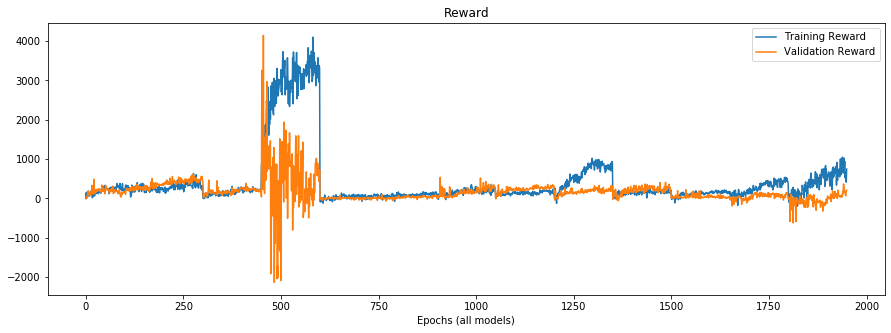

In [6]:
#Training
coloredlogs.install(level='DEBUG')
switch_k_backend_device() #switches to CPU (acc. to author faster than GPU)


reslist_t =[] # Train Reward for plotting
reslist_v = [] # Val Reward for plotting


for column in df_train:
    model_name = model_name + "_" + column
    print(model_name)

    #Init agent (model can be used with 2nd feature and without)
    
    if df2_train is not None:
        agent = Agent(window_size*2, pretrained=False, model_name=model_name)
    else:
        agent = Agent(window_size, pretrained=False, model_name=model_name)
    
    
    #create list out of dataframes
    df_train_list = list(df_train[column])
    df_val_list = list(df_val[column])

    for i in range(1, ep_count + 1): 
        initial_offset = df_train_list[1] - df_train_list[0]
             
        train_result = train_model(agent, i, df_train_list, df2_train_list, ep_count=ep_count,
                                batch_size=batch_size, window_size=window_size)
        val_result, _ = evaluate_model(agent, df_val_list, df2_val_list, window_size, debug)
        show_train_result(train_result, val_result, initial_offset)
      
        reslist_t.append(train_result[2]) # append reward of training
        reslist_v.append(val_result)
        
# Plotting Training History  
plt.figure(figsize = (15,5))
plt.plot(reslist_t, label = "Training Reward");
plt.plot(reslist_v, label = "Validation Reward");
plt.title("Reward")
plt.xlabel("Epochs (all models)")
plt.legend()
plt.show()

## Visualization of actions taken by Trading Bot

In [5]:
# Plot function
def visualize(df, history):
    # add history to dataframe
    position = [history[0][0]] + [x[0] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    df['position'] = position
    df['action'] = actions
    
    #alt.Chart(df.reset_index()).mark_line().encode(x='index')
    
    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)
    
    # plot a line chart for stock positions
    actual = alt.Chart(df.reset_index()).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='Date:T', #'date:T'
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
    points = alt.Chart(df.reset_index()).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('Date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
        #color=alt.Color('action', scale=alt.Scale(range=['blue', 'red']))
    ).interactive(bind_y=False)

    # merge the two charts
    chart = alt.layer(actual, points, title="your stock").properties(height=300, width=1000)
    
    return chart

## Testing the Model
__Test all Models created during training__

### Load different types of stocks in model:
 - See Test stocks
 - Difference to validation: every model ist tested with __every__ stock

 

 

In [10]:
# Loading Test Data
# Setting Start and Enddate for Validation

TestStocks = TStocks.append('Gold')
print(Stocks)
start_test = datetime.datetime(2017, 1, 1)
end_test = datetime.datetime.now()

# Load Test Data

# Load several stocks
df_test = web.DataReader(TStocks,'yahoo',
                               start=start_test, 
                               end=end_test)['Adj Close']

#Add random column for testing
#df_test['random']=np.random.randint(1,100,df_test.shape[0])
#df_test['sine']=50+50*np.sin(np.linspace(1,100,df_test.shape[0]))

# define second data input
df2_test = web.DataReader('GOLD','yahoo',
                               start=start_test, end=end_test)

# Convert df2_test to list
df2_test_list = list(df2_test['Adj Close'])


plt.figure();
df_test.plot();


NameError: name 'Stocks' is not defined

In [9]:
# Loop over all Models and test them
# If window size does not fit, pass and try next model

modelnames = []
result =[]

for models in os.listdir("models/"):

    
    #model_name = 'model_w15v2_40'
    model_name = models
    
    # Init Model
    window_size = 10

    #try: 
    # Initialize Agent
    if df2_test_list is not None:
        agent = Agent(window_size*2, pretrained=True, model_name=model_name)
    else:
        agent = Agent(window_size, pretrained=True, model_name=model_name)

    sum = 0
    # Loop over stocks
    for column in df_test:
        #print(column)
        #rename feature column name
        df_test_list = list(df_test[column])
        dft = df_test.rename(columns={column: 'actual'})
        initial_offset = df_test_list[1] - df_test_list[0]

        val_result, history = evaluate_model(agent, df_test_list, df2_test_list, window_size, debug)
        show_eval_result(model_name, val_result, initial_offset);
        chart = visualize(dft, history) # visualize plots actions to dataframe 
        sum = sum+val_result
        #print("Earnings of Model: ", model_name, " is: ", val_result)
        #chart.display()
    print("Sum of all earnings: ", model_name, " is: ", sum)
    modelnames.append(models)
    result.append(sum)
#  except: 
    print(models, "wrong windowsize")
#     pass
resdata = {'Model Name':[modelnames],'Sum of earnings':[result]}
df_result =pd.DataFrame(data=resdata)
print(df_result)



NameError: name 'df2_test_list' is not defined

In [23]:
tx1 = model_name + " = " + str(sum)
print(tx1)
result.append(tx1)
print(result)

model_w10v3_COST_20 = 735.8590865135193
[('model_w10v3_COST_20', ' = ', '735.8590865135193'), 'model_w10v3_COST_20 = 735.8590865135193', 'model_w10v3_COST_20 = 735.8590865135193', ('model_w10v3_COST_20', ' = ', '735.8590865135193'), ('model_w10v3_COST_20', ' = ', '735.8590865135193'), 'model_w10v3_COST_20 = 735.8590865135193', 'model_w10v3_COST_20 = 735.8590865135193', 'model_w10v3_COST_20 = 735.8590865135193', 'model_w10v3_COST_20 = 735.8590865135193', 'model_w10v3_COST_20 = 735.8590865135193', 'model_w10v3_COST_20 = 735.8590865135193']


I1007 02:29:55.491927 15072 evaluate.py:111] model_w10v3_COST_20: +$91.50

2019-10-07 02:29:55 PC-Stefan root[3960] INFO model_w10v3_COST_20: +$91.50



Earnings of :  AAPL  is:  91.49667358398438


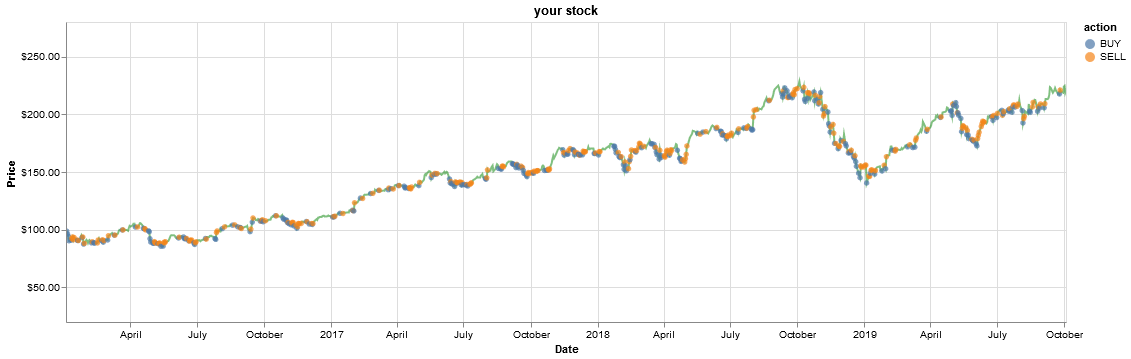

I1007 02:29:58.132617 15072 evaluate.py:111] model_w10v3_COST_20: +$382.66

2019-10-07 02:29:58 PC-Stefan root[3960] INFO model_w10v3_COST_20: +$382.66



Earnings of :  ADBE  is:  382.6598358154297


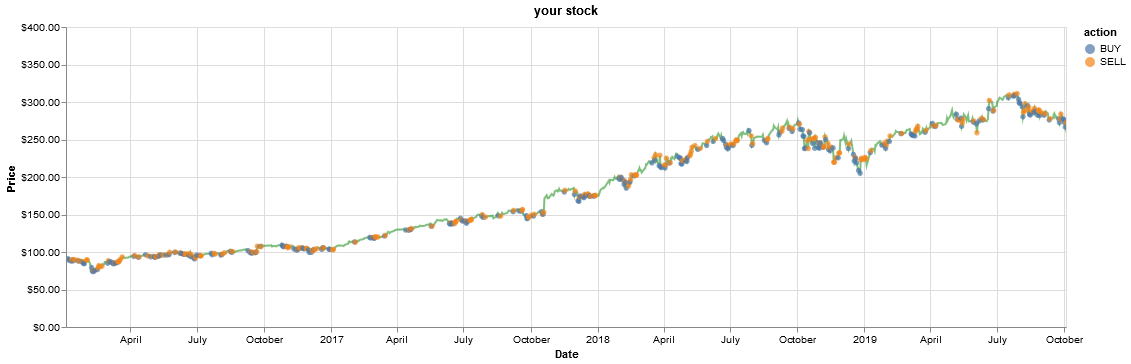

I1007 02:30:00.897301 15072 evaluate.py:111] model_w10v3_COST_20: -$16.14

2019-10-07 02:30:00 PC-Stefan root[3960] INFO model_w10v3_COST_20: -$16.14



Earnings of :  ANF  is:  -16.136780738830566


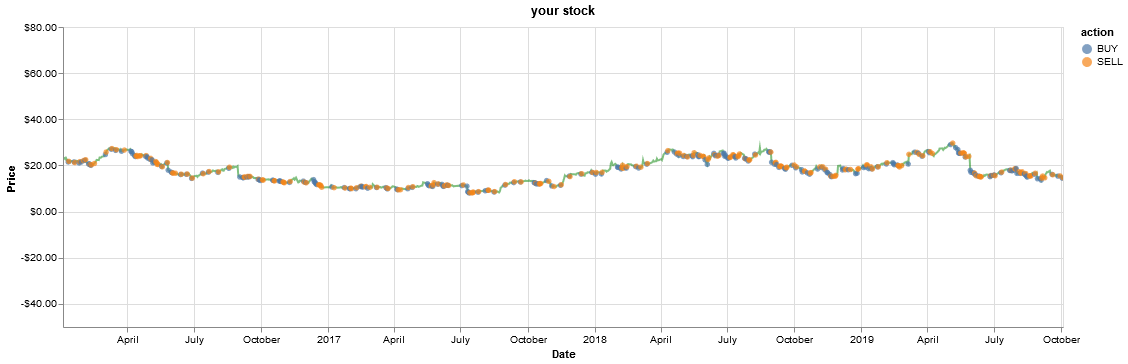

I1007 02:30:03.631863 15072 evaluate.py:111] model_w10v3_COST_20: +$133.27

2019-10-07 02:30:03 PC-Stefan root[3960] INFO model_w10v3_COST_20: +$133.27



Earnings of :  COST  is:  133.2709197998047


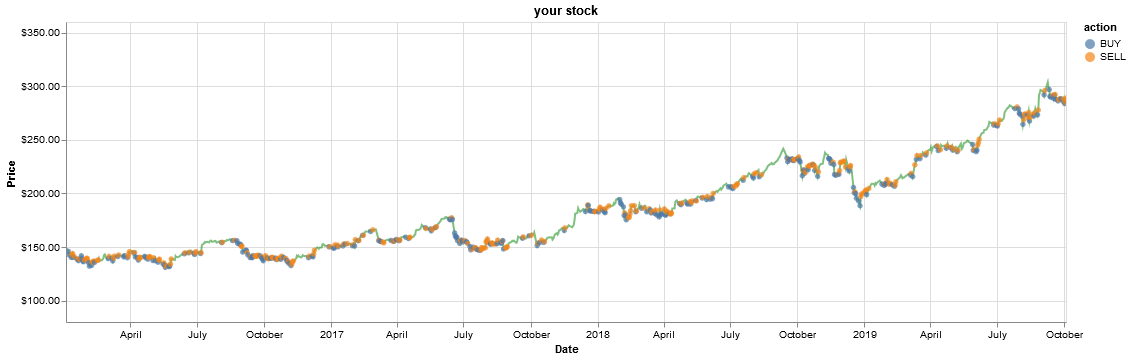

I1007 02:30:06.361633 15072 evaluate.py:111] model_w10v3_COST_20: -$1.96

2019-10-07 02:30:06 PC-Stefan root[3960] INFO model_w10v3_COST_20: -$1.96



Earnings of :  GOLD  is:  -1.9570517539978027


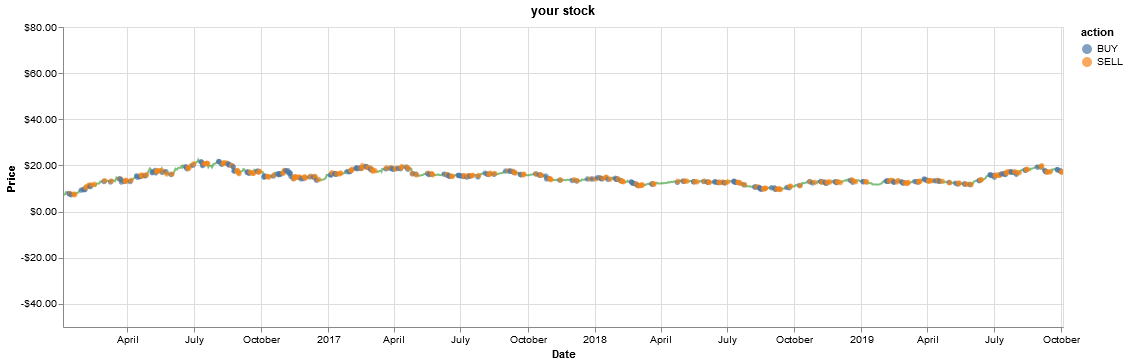

I1007 02:30:09.018061 15072 evaluate.py:111] model_w10v3_COST_20: +$146.53

2019-10-07 02:30:09 PC-Stefan root[3960] INFO model_w10v3_COST_20: +$146.53



Earnings of :  RCL  is:  146.5254898071289


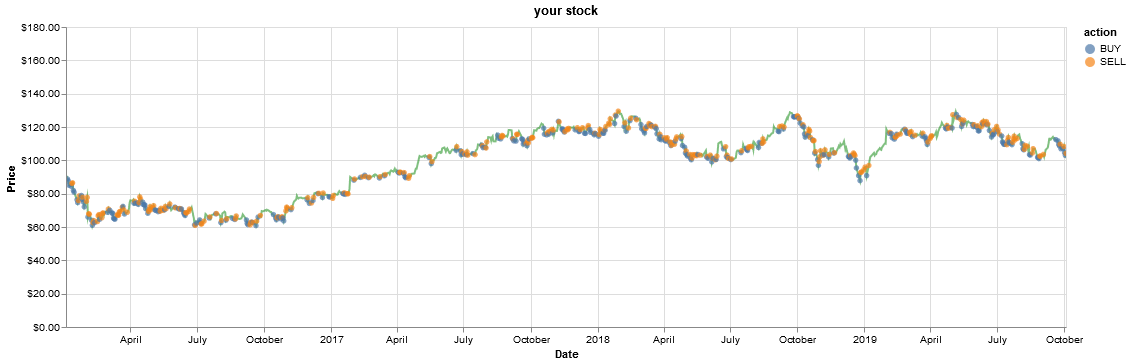

Sum of all earnings:  model_w10v3_COST_20  is:  735.8590865135193


In [8]:
# Test 1 model
    
#model_name = 'model_w15v2_40' model_Stefan_10
model_name = "model_w10v3_COST_20"

# Init Model
window_size = 10


# Initialize Agent
if df2_test_list is not None:
    agent = Agent(window_size*2, pretrained=True, model_name=model_name)
else:
    agent = Agent(window_size, pretrained=True, model_name=model_name)

sum = 0
# Loop over stocks
for column in df_test:
    #print(column)
    #rename feature column name
    df_test_list = list(df_test[column])
    dft = df_test.rename(columns={column: 'actual'})
    initial_offset = df_test_list[1] - df_test_list[0]
    val_result, history = evaluate_model(agent, df_test_list, df2_test_list, window_size, debug)
    show_eval_result(model_name, val_result, initial_offset);
    chart = visualize(dft, history)
    sum = sum+val_result
    print("Earnings of : ", column, " is: ", val_result)
    chart.display()
print("Sum of all earnings: ", model_name, " is: ", sum)


In [9]:
dft.head(200)

Symbols,AAPL,ADBE,ANF,COST,GOLD,actual,position,action
Date,,,,,,,,
2016-01-04,98.742249,91.970001,23.073023,147.152557,7.478310,90.324860,90.324860,HOLD
2016-01-05,96.267815,92.339996,23.216385,147.512253,7.381814,88.852280,90.324860,HOLD
2016-01-06,94.383888,91.019997,22.752563,146.147202,7.661649,87.720222,88.852280,BUY
2016-01-07,90.400467,89.110001,23.283852,142.799042,8.443253,85.069565,87.720222,BUY
2016-01-08,90.878479,87.849998,21.529758,140.299454,8.124820,84.471329,85.069565,BUY
2016-01-11,92.350006,89.379997,21.816490,142.706802,7.864287,86.146400,84.471329,BUY
2016-01-12,93.690300,89.820000,21.959852,143.942764,7.623052,86.532928,86.146400,SELL
2016-01-13,91.281494,88.300003,21.529758,140.308655,7.758143,81.949516,86.532928,SELL
2016-01-14,93.277916,89.800003,21.993586,141.286377,7.314269,80.900299,81.949516,BUY
